# Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
LitDF = pd.read_csv('COVID_Education_Merged.csv', index_col = 0)
LitDF.head()

,State,cases,deaths,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017
0,Alabama,387786,14345,231,145,267,141,624760,2219105,28.153693,493174,248175,741349,470043.0,1020172.0,987148.0,822595.0,25212
1,Alaska,18316,367,236,154,280,154,108145,371180,29.135460,506,293,799,34760.0,133851.0,169471.0,139645.0,15623
2,Arizona,426614,18857,238,149,283,148,1014830,3396895,29.875224,560204,321105,881309,613002.0,1112551.0,1570308.0,1338071.0,88629
3,Arkansas,161569,3301,235,150,275,148,347335,1379145,25.184807,20363,15171,35534,276029.0,681223.0,590434.0,451621.0,39836
4,California,2664110,102387,232,140,275,143,7115070,20038675,35.506689,49711105,2676741,52387846,4475565.0,5391120.0,7633463.0,8718737.0,1197296


In [3]:
LitDF = LitDF.drop(columns = ['cases', 'deaths'])
LitDF.head()

,State,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017
0,Alabama,231,145,267,141,624760,2219105,28.153693,493174,248175,741349,470043.0,1020172.0,987148.0,822595.0,25212
1,Alaska,236,154,280,154,108145,371180,29.135460,506,293,799,34760.0,133851.0,169471.0,139645.0,15623
2,Arizona,238,149,283,148,1014830,3396895,29.875224,560204,321105,881309,613002.0,1112551.0,1570308.0,1338071.0,88629
3,Arkansas,235,150,275,148,347335,1379145,25.184807,20363,15171,35534,276029.0,681223.0,590434.0,451621.0,39836
4,California,232,140,275,143,7115070,20038675,35.506689,49711105,2676741,52387846,4475565.0,5391120.0,7633463.0,8718737.0,1197296


In [4]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [5]:
LitDF = pd.merge(LitDF, COVID, how = 'left', on = 'State')
LitDF.head()

,State,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017,cases,deaths
0,Alabama,231,145,267,141,624760,2219105,28.153693,493174,248175,741349,470043.0,1020172.0,987148.0,822595.0,25212,26912,785
1,Alaska,236,154,280,154,108145,371180,29.135460,506,293,799,34760.0,133851.0,169471.0,139645.0,15623,751,10
2,Arizona,238,149,283,148,1014830,3396895,29.875224,560204,321105,881309,613002.0,1112551.0,1570308.0,1338071.0,88629,39298,1228
3,Arkansas,235,150,275,148,347335,1379145,25.184807,20363,15171,35534,276029.0,681223.0,590434.0,451621.0,39836,13191,188
4,California,232,140,275,143,7115070,20038675,35.506689,49711105,2676741,52387846,4475565.0,5391120.0,7633463.0,8718737.0,1197296,159098,5202


In [6]:
LitDF.shape

(51, 18)

In [7]:
LitDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    51 non-null     object 
 1   4th 2015 Math                            51 non-null     int64  
 2   4th 2015 Science                         51 non-null     int64  
 3   8th 2015 Math                            51 non-null     int64  
 4   8th 2015 Science                         51 non-null     int64  
 5   Labor Force w/ Bachelor 2018             51 non-null     int64  
 6   Labor Force Participants 2018            51 non-null     int64  
 7   Percent of Labor Force w/ Bachelor 2018  51 non-null     float64
 8   Doctorate From Doc Inst 2018             51 non-null     int64  
 9   Doctorate From Bach Inst 2018            51 non-null     int64  
 10  Total Doctorate Degrees 2018             51 non-null

In [8]:
LitDF.isnull().sum()

State                                      0
4th 2015 Math                              0
4th 2015 Science                           0
8th 2015 Math                              0
8th 2015 Science                           0
Labor Force w/ Bachelor 2018               0
Labor Force Participants 2018              0
Percent of Labor Force w/ Bachelor 2018    0
Doctorate From Doc Inst 2018               0
Doctorate From Bach Inst 2018              0
Total Doctorate Degrees 2018               0
Less Than HS Diploma 14-18                 0
HS Diploma 14-18                           0
Some College or Associate Degree 14-18     0
Bachelor Degree or Higher 14-18            0
ELL Students Enrolled 2017                 0
cases                                      0
deaths                                     0
dtype: int64

In [9]:
LitDF.describe()

,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017,cases,deaths
count,51.000000,51.000000,51.000000,51.000000,5.100000e+01,5.100000e+01,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000
mean,240.274510,154.411765,281.725490,154.529412,1.112628e+06,3.233299e+06,33.496384,2.750370e+06,4.391372e+05,3.189507e+06,5.283933e+05,1.162065e+06,1.242464e+06,1.350334e+06,9.711192e+04,41994.235294,2290.549020
std,4.956121,5.783343,7.122018,6.041036,1.307552e+06,3.690659e+06,7.016406,9.025357e+06,5.524365e+05,9.456177e+06,7.729664e+05,1.185706e+06,1.386208e+06,1.583990e+06,2.073377e+05,63513.183767,4748.588326
min,231.000000,140.000000,263.000000,140.000000,7.860500e+04,2.991200e+05,24.087334,4.190000e+02,2.930000e+02,7.990000e+02,2.764400e+04,8.357200e+04,7.725500e+04,1.046770e+05,1.770000e+03,614.000000,10.000000
25%,237.000000,152.000000,278.000000,150.500000,2.633925e+05,8.138475e+05,29.324344,2.153700e+04,1.464700e+04,3.368050e+04,1.067150e+05,3.172810e+05,3.620070e+05,3.342105e+05,1.519800e+04,9231.500000,212.000000
50%,240.000000,154.000000,283.000000,155.000000,6.247600e+05,2.135975e+06,31.808287,4.411270e+05,2.811260e+05,7.012500e+05,3.163450e+05,8.064070e+05,8.730370e+05,8.225950e+05,4.622000e+04,20152.000000,704.000000
75%,243.500000,158.000000,286.000000,159.500000,1.509512e+06,3.831268e+06,36.309370,1.139802e+06,6.112510e+05,1.765433e+06,6.015450e+05,1.424464e+06,1.485197e+06,1.850156e+06,8.513200e+04,46961.500000,2469.500000
max,251.000000,165.000000,297.000000,166.000000,7.115070e+06,2.003868e+07,65.744864,4.971110e+07,2.676741e+06,5.238785e+07,4.475565e+06,5.391120e+06,7.633463e+06,8.718737e+06,1.197296e+06,389349.000000,30683.000000


In [10]:
Pcorr = LitDF.corr(method = 'pearson')
Pcorr

,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017,cases,deaths
4th 2015 Math,1.000000,0.783754,0.864560,0.733189,-0.005124,-0.024376,0.127754,-0.157697,0.064699,-0.146733,-0.123821,-0.006926,-0.048070,-0.017034,-0.101403,-0.020015,-0.008837
4th 2015 Science,0.783754,1.000000,0.646174,0.904980,-0.219274,-0.231893,0.199784,-0.310751,-0.155567,-0.305681,-0.303916,-0.196820,-0.246639,-0.227177,-0.285405,-0.171858,-0.121711
8th 2015 Math,0.864560,0.646174,1.000000,0.721643,0.010118,-0.039077,0.172806,-0.085366,0.072352,-0.077250,-0.134261,-0.076968,-0.077137,-0.008563,-0.070592,0.056504,0.083333
8th 2015 Science,0.733189,0.904980,0.721643,1.000000,-0.211074,-0.230141,0.202853,-0.242779,-0.137878,-0.239773,-0.298405,-0.232277,-0.252274,-0.224239,-0.233053,-0.174454,-0.113649
Labor Force w/ Bachelor 2018,-0.005124,-0.219274,0.010118,-0.211074,1.000000,0.988968,0.209910,0.863215,0.924924,0.877922,0.959875,0.947824,0.970608,0.998761,0.884792,0.745888,0.551711
Labor Force Participants 2018,-0.024376,-0.231893,-0.039077,-0.230141,0.988968,1.000000,0.116554,0.852557,0.893173,0.865895,0.978909,0.969499,0.992953,0.991102,0.908127,0.674152,0.466006
Percent of Labor Force w/ Bachelor 2018,0.127754,0.199784,0.172806,0.202853,0.209910,0.116554,1.000000,0.109460,0.269355,0.120209,0.053165,0.059317,0.061346,0.192764,0.061734,0.313655,0.322842
Doctorate From Doc Inst 2018,-0.157697,-0.310751,-0.085366,-0.242779,0.863215,0.852557,0.109460,1.000000,0.767862,0.999299,0.907477,0.751089,0.825058,0.857097,0.904531,0.665628,0.502443
Doctorate From Bach Inst 2018,0.064699,-0.155567,0.072352,-0.137878,0.924924,0.893173,0.269355,0.767862,1.000000,0.791299,0.832148,0.880645,0.862737,0.917743,0.716667,0.782081,0.642154
Total Doctorate Degrees 2018,-0.146733,-0.305681,-0.077250,-0.239773,0.877922,0.865895,0.120209,0.999299,0.791299,1.000000,0.914748,0.768318,0.837871,0.871663,0.905189,0.680992,0.517067


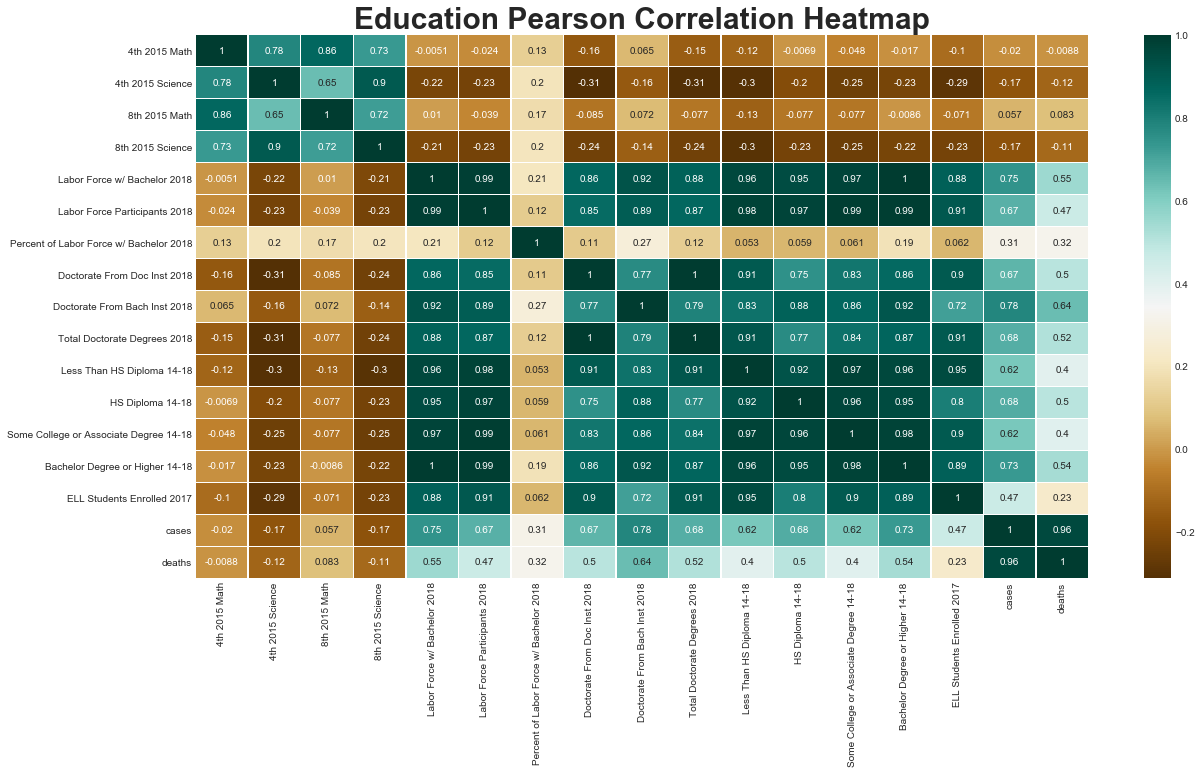

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Education Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [12]:
Kcorr = LitDF.corr(method = 'kendall')
Kcorr

,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017,cases,deaths
4th 2015 Math,1.000000,0.637495,0.721085,0.559671,0.099586,0.075493,0.207204,0.101193,0.147773,0.107618,-0.028912,0.049793,0.069068,0.094768,0.056218,0.073887,0.039368
4th 2015 Science,0.637495,1.000000,0.565086,0.780170,-0.070967,-0.087095,0.096773,-0.056451,0.001613,-0.048386,-0.170965,-0.104837,-0.091934,-0.079031,-0.164513,-0.098385,-0.129888
8th 2015 Math,0.721085,0.565086,1.000000,0.621514,0.016023,-0.017625,0.304434,0.000000,0.051273,0.000000,-0.137796,-0.072103,-0.036853,0.016023,-0.024034,-0.006409,-0.020036
8th 2015 Science,0.559671,0.780170,0.621514,1.000000,-0.110921,-0.143072,0.152718,-0.115744,-0.032151,-0.102883,-0.245956,-0.170401,-0.144680,-0.117351,-0.194514,-0.151110,-0.161623
Labor Force w/ Bachelor 2018,0.099586,-0.070967,0.016023,-0.110921,1.000000,0.912157,0.300392,0.805490,0.802353,0.819608,0.800784,0.813333,0.849412,0.973333,0.734902,0.744314,0.696744
Labor Force Participants 2018,0.075493,-0.087095,-0.017625,-0.143072,0.912157,1.000000,0.212549,0.786667,0.774118,0.800784,0.866667,0.888627,0.927843,0.920000,0.731765,0.734902,0.662221
Percent of Labor Force w/ Bachelor 2018,0.207204,0.096773,0.304434,0.152718,0.300392,0.212549,1.000000,0.287843,0.322353,0.283137,0.126275,0.132549,0.152941,0.289412,0.220392,0.270588,0.309141
Doctorate From Doc Inst 2018,0.101193,-0.056451,0.000000,-0.115744,0.805490,0.786667,0.287843,1.000000,0.849412,0.954510,0.716078,0.744314,0.739608,0.788235,0.656471,0.775686,0.739113
Doctorate From Bach Inst 2018,0.147773,0.001613,0.051273,-0.032151,0.802353,0.774118,0.322353,0.849412,1.000000,0.894902,0.700392,0.744314,0.745882,0.794510,0.634510,0.738039,0.706159
Total Doctorate Degrees 2018,0.107618,-0.048386,0.000000,-0.102883,0.819608,0.800784,0.283137,0.954510,0.894902,1.000000,0.727059,0.761569,0.763137,0.805490,0.661176,0.780392,0.750098


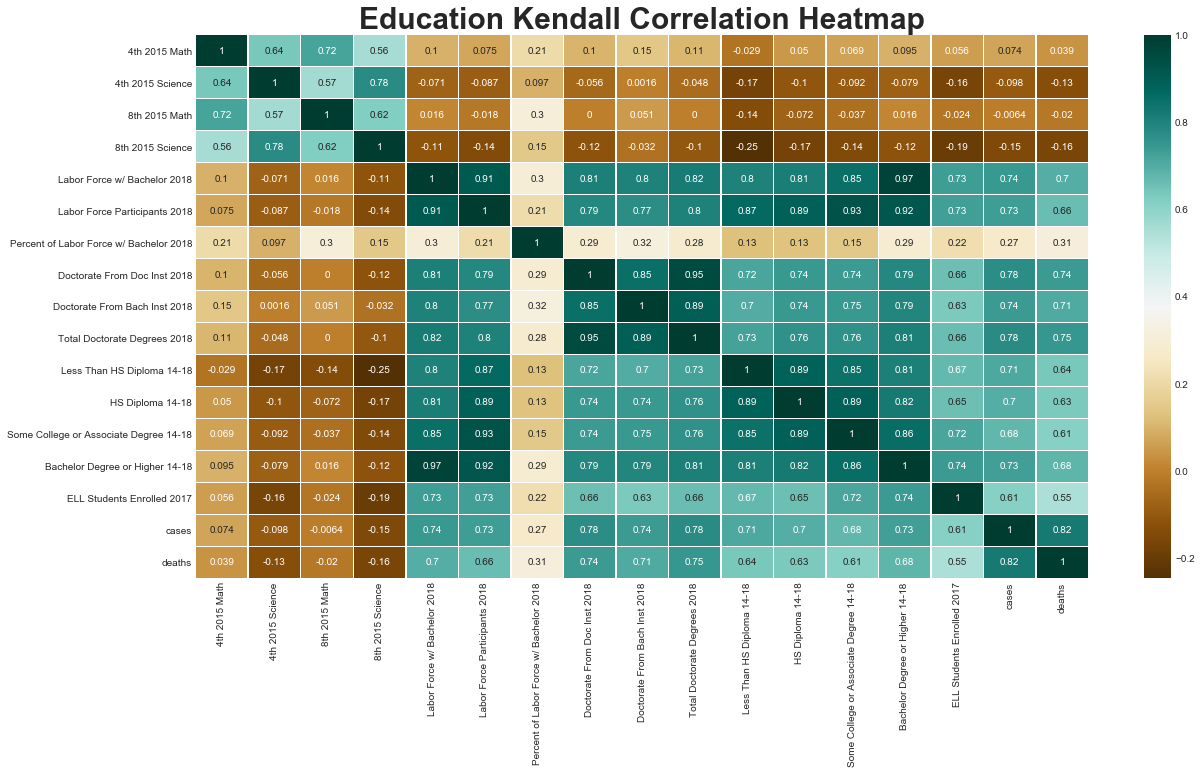

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Education Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [15]:
Scorr = LitDF.corr(method = 'spearman')
Scorr

,4th 2015 Math,4th 2015 Science,8th 2015 Math,8th 2015 Science,Labor Force w/ Bachelor 2018,Labor Force Participants 2018,Percent of Labor Force w/ Bachelor 2018,Doctorate From Doc Inst 2018,Doctorate From Bach Inst 2018,Total Doctorate Degrees 2018,Less Than HS Diploma 14-18,HS Diploma 14-18,Some College or Associate Degree 14-18,Bachelor Degree or Higher 14-18,ELL Students Enrolled 2017,cases,deaths
4th 2015 Math,1.000000,0.809447,0.853274,0.736502,0.158999,0.129430,0.291695,0.145893,0.199951,0.158092,-0.024943,0.077096,0.114465,0.150473,0.074692,0.097957,0.051021
4th 2015 Science,0.809447,1.000000,0.719481,0.908133,-0.101422,-0.126176,0.148296,-0.109235,-0.013217,-0.088387,-0.243177,-0.149204,-0.134215,-0.117910,-0.213200,-0.133897,-0.176800
8th 2015 Math,0.853274,0.719481,1.000000,0.797618,0.025344,-0.019813,0.421827,0.000635,0.071861,0.004851,-0.201075,-0.097976,-0.036497,0.016004,-0.025299,-0.006393,-0.027725
8th 2015 Science,0.736502,0.908133,0.797618,1.000000,-0.152559,-0.194022,0.226502,-0.176239,-0.056251,-0.157867,-0.345084,-0.231855,-0.200055,-0.167257,-0.254174,-0.198830,-0.221653
Labor Force w/ Bachelor 2018,0.158999,-0.101422,0.025344,-0.152559,1.000000,0.983710,0.419095,0.947783,0.944163,0.953665,0.934208,0.947692,0.961629,0.997466,0.902172,0.917376,0.873956
Labor Force Participants 2018,0.129430,-0.126176,-0.019813,-0.194022,0.983710,1.000000,0.294480,0.932851,0.929231,0.941176,0.968054,0.979005,0.990045,0.987421,0.903258,0.907421,0.850110
Percent of Labor Force w/ Bachelor 2018,0.291695,0.148296,0.421827,0.226502,0.419095,0.294480,1.000000,0.407873,0.442805,0.402081,0.154661,0.177014,0.221538,0.402353,0.316290,0.390136,0.432453
Doctorate From Doc Inst 2018,0.145893,-0.109235,0.000635,-0.176239,0.947783,0.932851,0.407873,1.000000,0.960905,0.994480,0.884706,0.904163,0.906787,0.937738,0.849955,0.929774,0.904274
Doctorate From Bach Inst 2018,0.199951,-0.013217,0.071861,-0.056251,0.944163,0.929231,0.442805,0.960905,1.000000,0.977014,0.868778,0.904163,0.906335,0.938824,0.818914,0.911222,0.882871
Total Doctorate Degrees 2018,0.158092,-0.088387,0.004851,-0.157867,0.953665,0.941176,0.402081,0.994480,0.977014,1.000000,0.893394,0.915475,0.916109,0.944525,0.847692,0.932851,0.909568


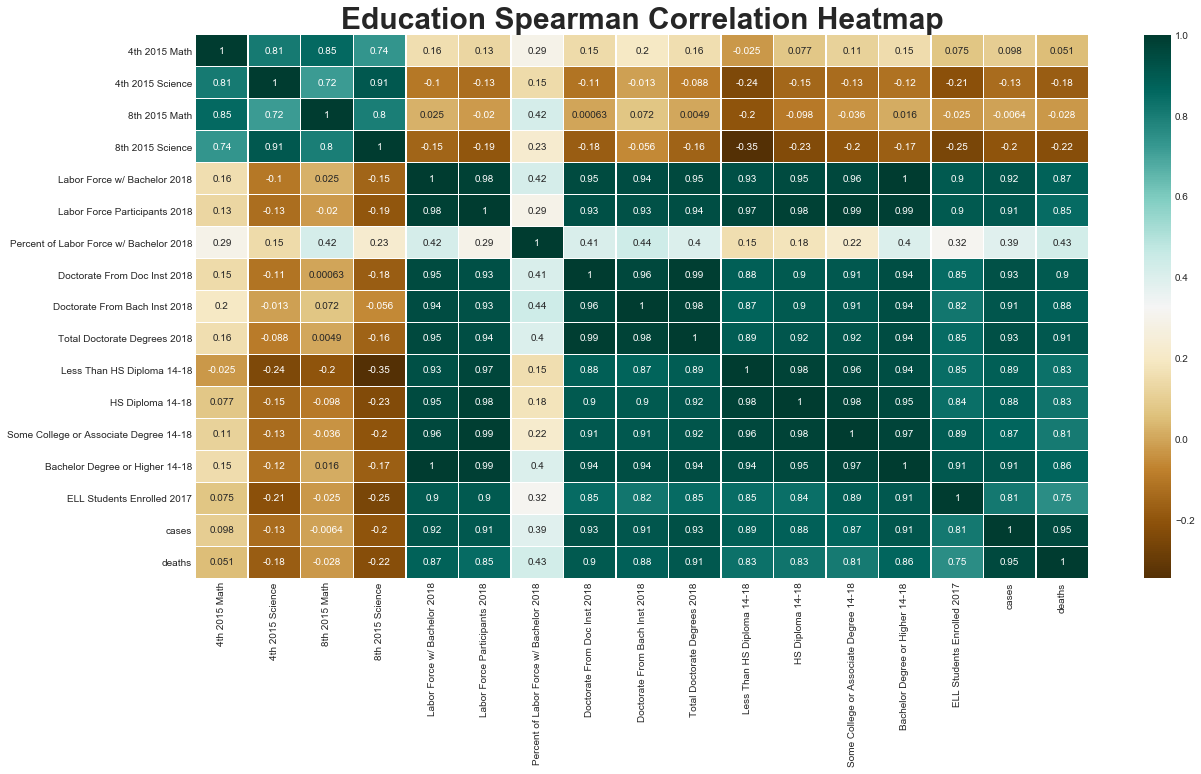

In [16]:
plt.figure(figsize = (20,10))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Education Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 30);

In [90]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Education'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([15, 16])

AllCorr

,Education,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,4th 2015 Math,-0.020015,0.073887,0.097957
1,4th 2015 Science,-0.171858,-0.098385,-0.133897
2,8th 2015 Math,0.056504,-0.006409,-0.006393
3,8th 2015 Science,-0.174454,-0.151110,-0.198830
4,Labor Force w/ Bachelor 2018,0.745888,0.744314,0.917376
5,Labor Force Participants 2018,0.674152,0.734902,0.907421
6,Percent of Labor Force w/ Bachelor 2018,0.313655,0.270588,0.390136
7,Doctorate From Doc Inst 2018,0.665628,0.775686,0.929774
8,Doctorate From Bach Inst 2018,0.782081,0.738039,0.911222
9,Total Doctorate Degrees 2018,0.680992,0.780392,0.932851


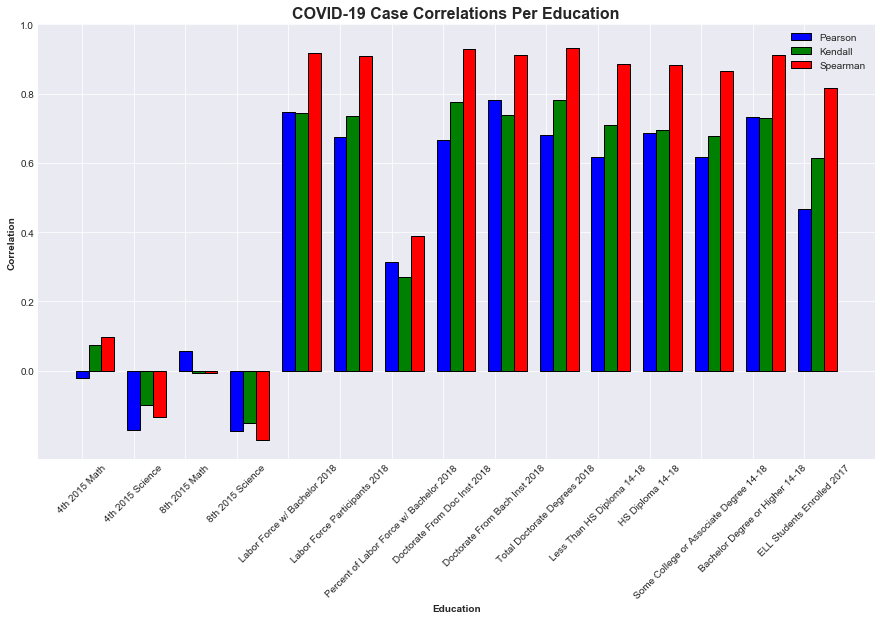

In [91]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Education'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Education', fontsize = 16, fontweight = 'bold')

plt.xlabel('Education', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

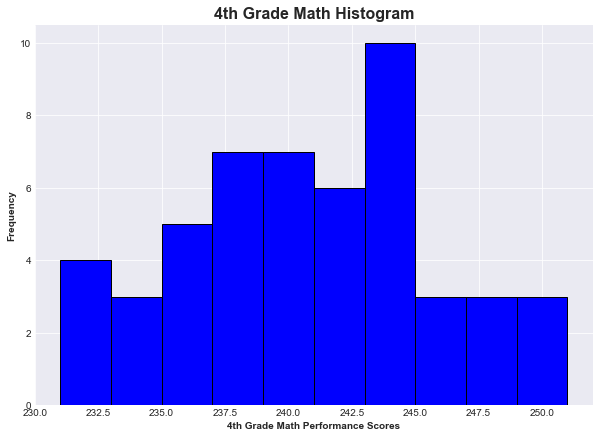

In [19]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Math'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th Grade Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

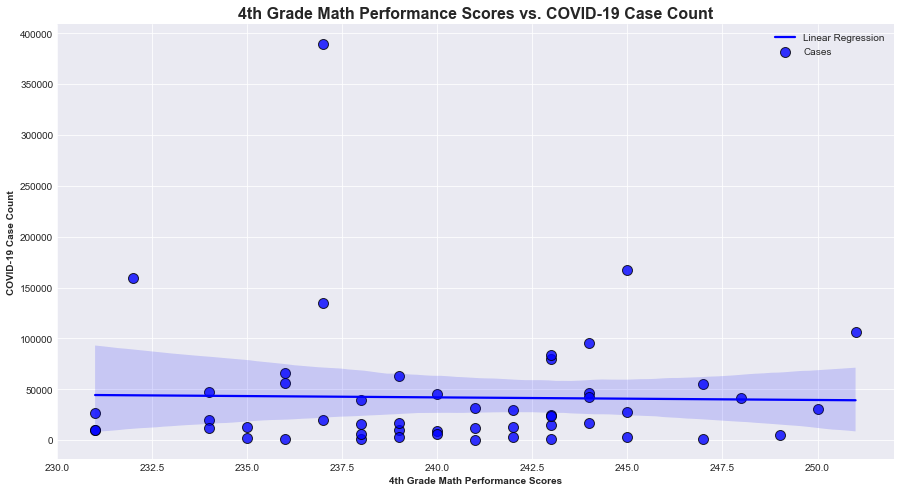

In [20]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [21]:
spearmanr(LitDF['cases'], LitDF['4th 2015 Math'])

SpearmanrResult(correlation=0.09795720924722512, pvalue=0.4940641454365834)

In [22]:
model1 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Math']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.308
Model:                            OLS   Adj. R-squared (uncentered):              0.294
Method:                 Least Squares   F-statistic:                              22.24
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.96e-05
Time:                        00:23:03   Log-Likelihood:                         -635.89
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
4th 2015 Math   174.5963     37.020      4.716      0.000     100.239     248.954
==============================================================================
Omnibus:                       69.614   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              660.521
Skew:                           3.623   Prob(JB):                    3.71e-144
Kurtosis:                      19.072   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

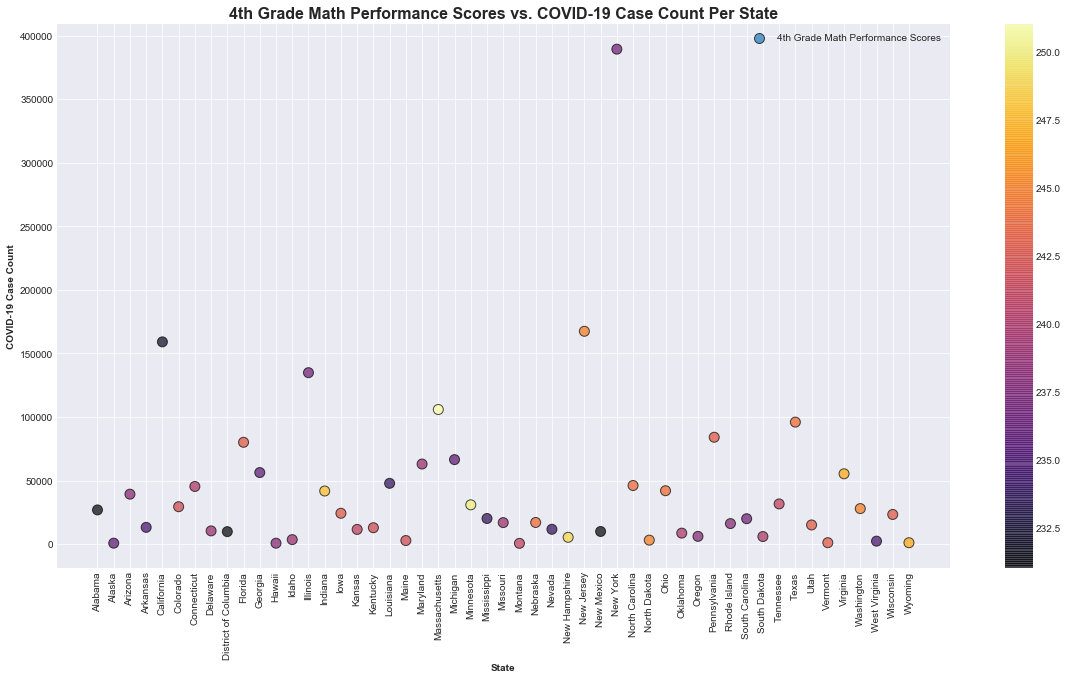

In [23]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Math'], cmap = 'inferno')
plt.title('4th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

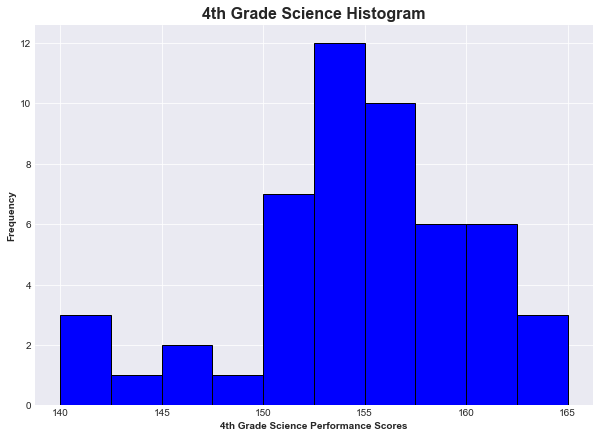

In [24]:
plt.style.use('seaborn-darkgrid')

LitDF['4th 2015 Science'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('4th Grade Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

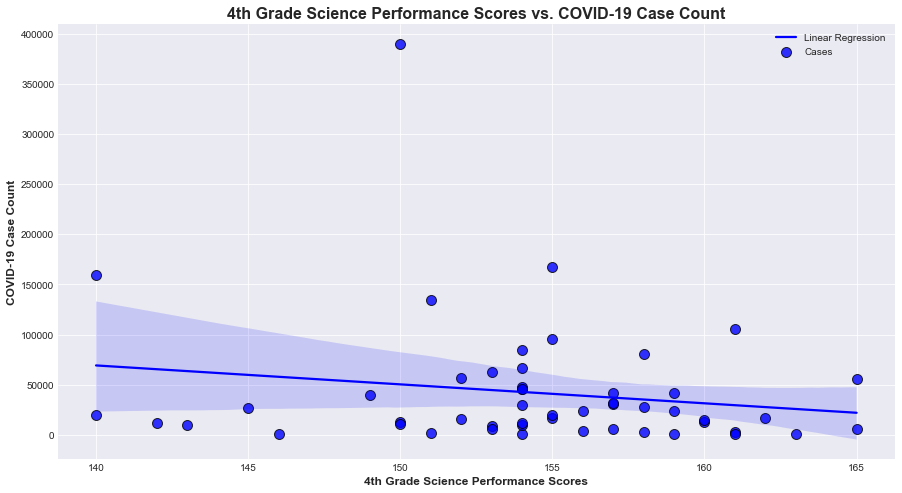

In [25]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '4th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('4th Grade Science Performance Scores', fontsize = 12, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 12, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [26]:
spearmanr(LitDF['cases'], LitDF['4th 2015 Science'])

SpearmanrResult(correlation=-0.13389748594146964, pvalue=0.3488918684278318)

In [27]:
model2 = sm.OLS(LitDF['cases'], LitDF['4th 2015 Science']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.288
Method:                 Least Squares   F-statistic:                              21.65
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    2.44e-05
Time:                        00:23:06   Log-Likelihood:                         -636.10
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
4th 2015 Science   268.9970     57.818      4.653      0.000     152.867     385.127
==============================================================================
Omnibus:                       69.288   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              649.017
Skew:                           3.605   Prob(JB):                    1.17e-141
Kurtosis:                      18.919   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

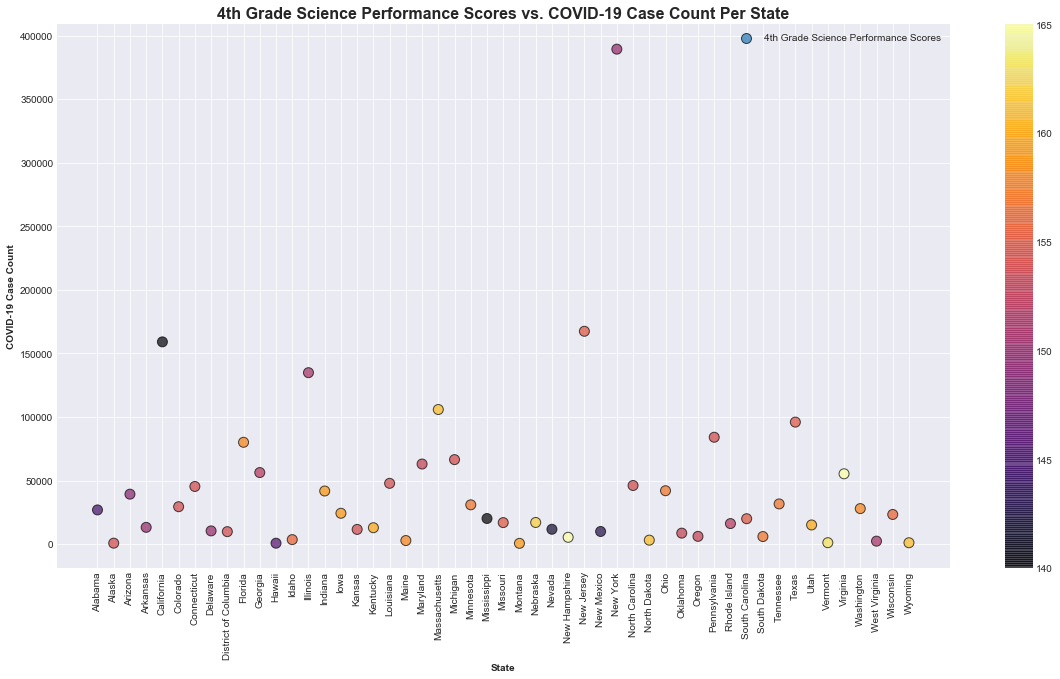

In [28]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['4th 2015 Science'], cmap = 'inferno')
plt.title('4th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['4th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

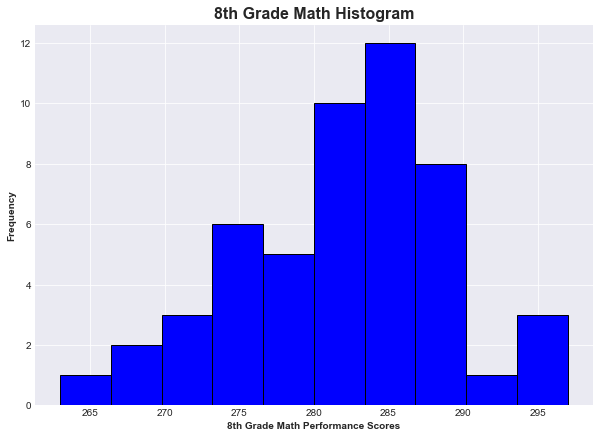

In [29]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Math'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('8th Grade Math Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

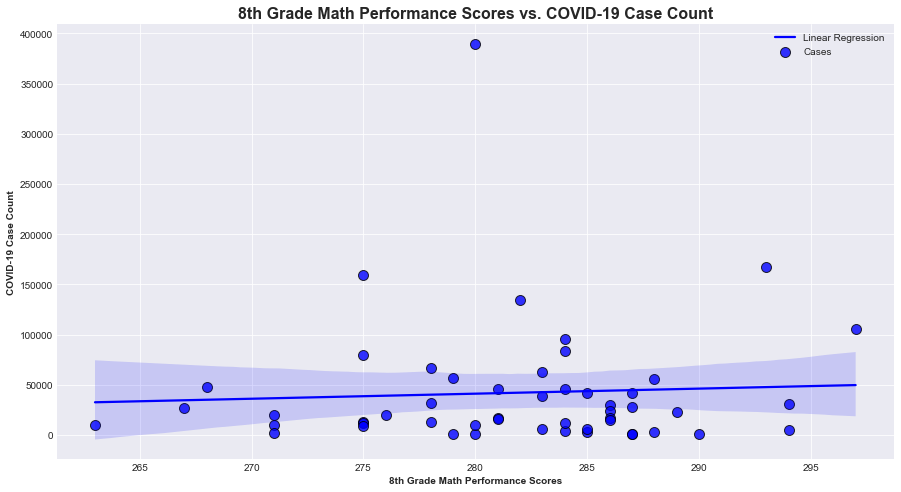

In [30]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Math', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Math Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [31]:
spearmanr(LitDF['cases'], LitDF['8th 2015 Math'])

SpearmanrResult(correlation=-0.00639268579411227, pvalue=0.9644886800170045)

In [32]:
model3 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Math']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.310
Model:                            OLS   Adj. R-squared (uncentered):              0.296
Method:                 Least Squares   F-statistic:                              22.41
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.85e-05
Time:                        00:23:08   Log-Likelihood:                         -635.83
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
8th 2015 Math   149.2830     31.533      4.734      0.000      85.947     212.619
==============================================================================
Omnibus:                       69.596   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              661.025
Skew:                           3.621   Prob(JB):                    2.89e-144
Kurtosis:                      19.082   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

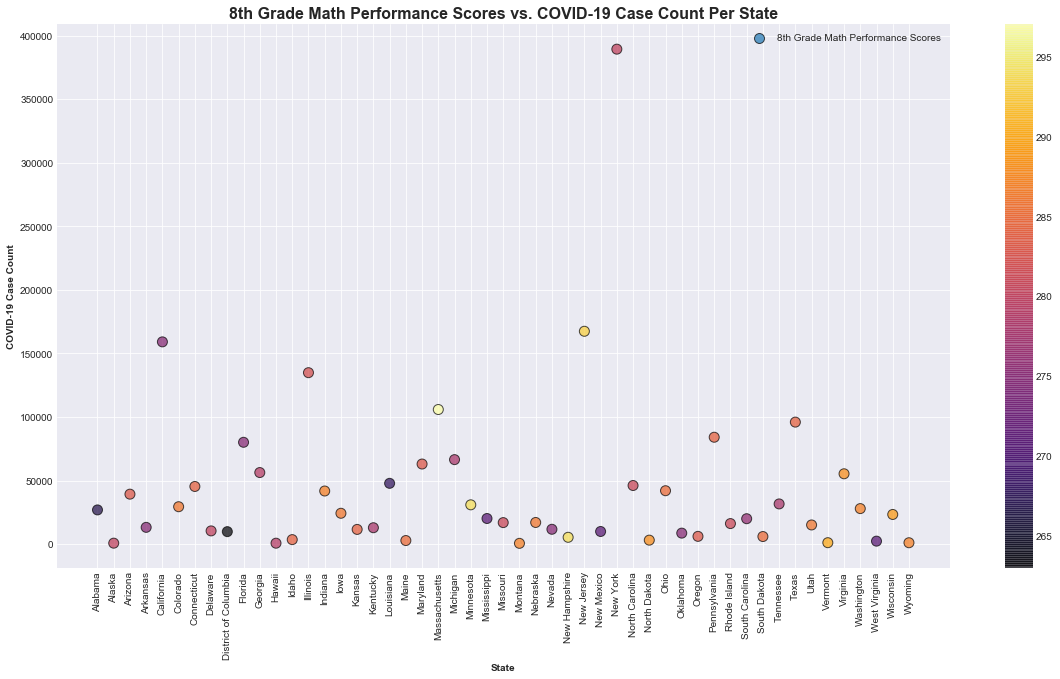

In [33]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Math'], cmap = 'inferno')
plt.title('8th Grade Math Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Math Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

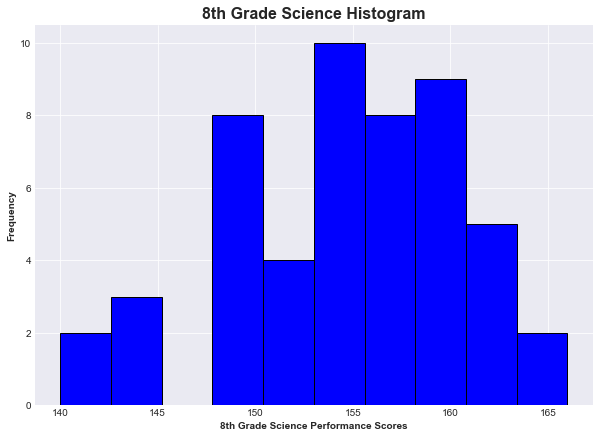

In [34]:
plt.style.use('seaborn-darkgrid')

LitDF['8th 2015 Science'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('8th Grade Science Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

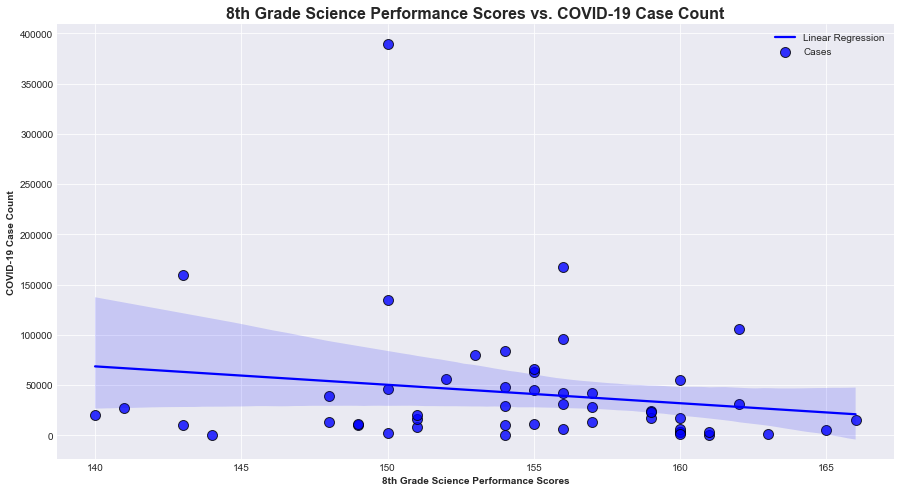

In [35]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = '8th 2015 Science', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('8th Grade Science Performance Scores', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [36]:
spearmanr(LitDF['cases'], LitDF['8th 2015 Science'])

SpearmanrResult(correlation=-0.19883025507673668, pvalue=0.16189084514845328)

In [37]:
model4 = sm.OLS(LitDF['cases'], LitDF['8th 2015 Science']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.302
Model:                            OLS   Adj. R-squared (uncentered):              0.288
Method:                 Least Squares   F-statistic:                              21.61
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    2.47e-05
Time:                        00:23:10   Log-Likelihood:                         -636.11
No. Observations:                  51   AIC:                                      1274.
Df Residuals:                      50   BIC:                                      1276.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
8th 2015 Science   268.6051     57.786      4.648      0.000     152.538     384.672
==============================================================================
Omnibus:                       69.204   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              647.206
Skew:                           3.600   Prob(JB):                    2.89e-141
Kurtosis:                      18.898   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

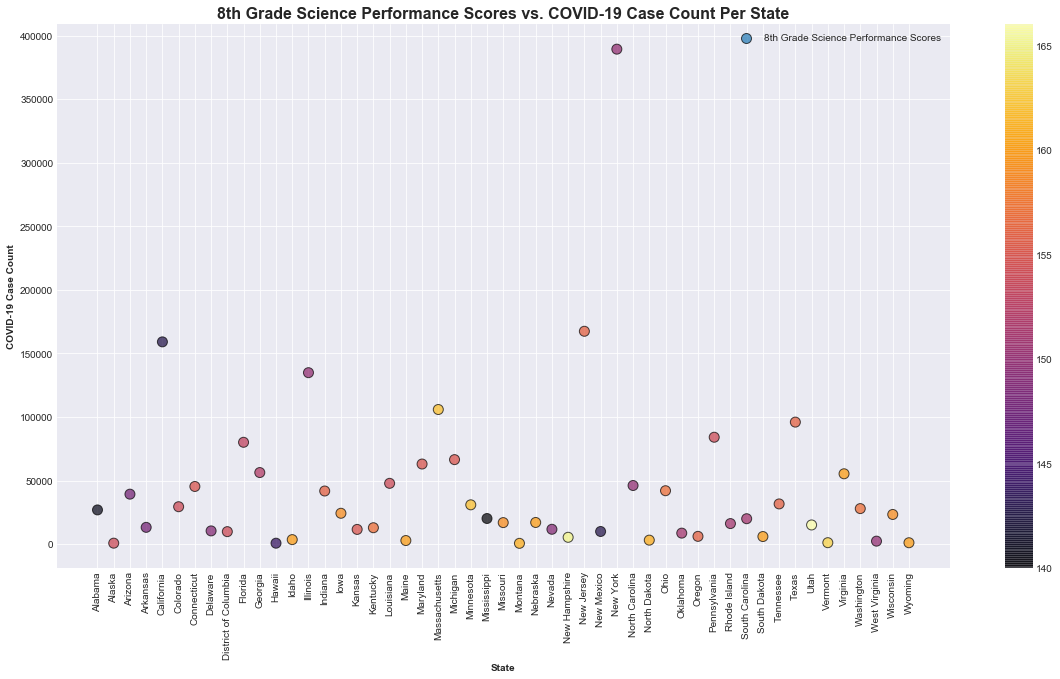

In [38]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['8th 2015 Science'], cmap = 'inferno')
plt.title('8th Grade Science Performance Scores vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['8th Grade Science Performance Scores'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

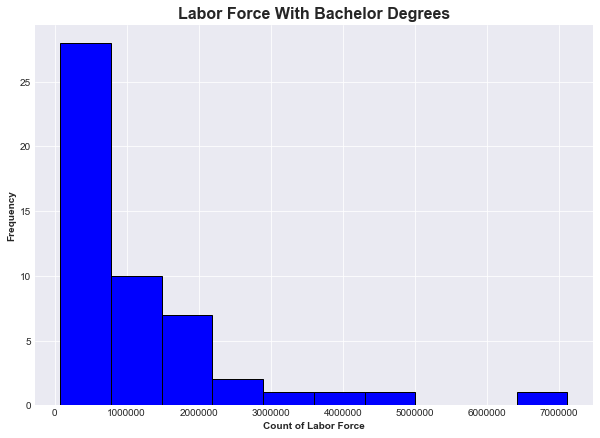

In [39]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force w/ Bachelor 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Labor Force With Bachelor Degrees', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

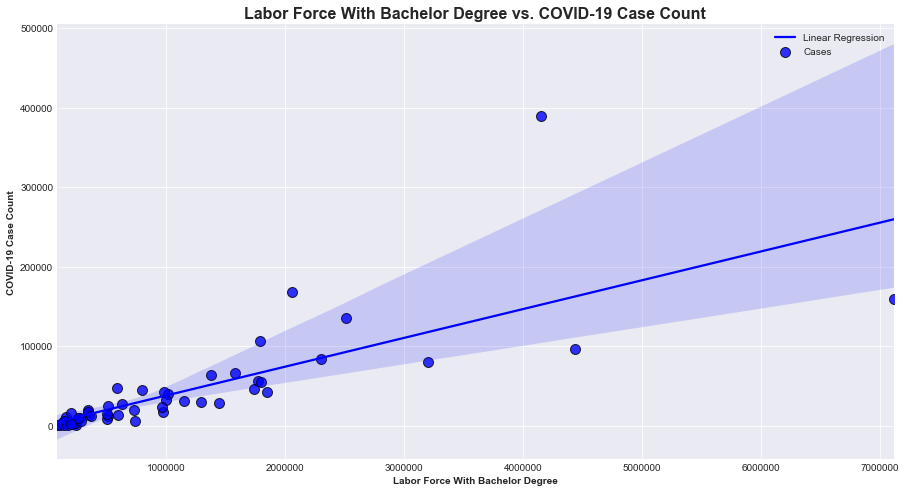

In [40]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Labor Force w/ Bachelor 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Labor Force With Bachelor Degree', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [41]:
spearmanr(LitDF['cases'], LitDF['Labor Force w/ Bachelor 2018'])

SpearmanrResult(correlation=0.9173755656108596, pvalue=3.061783373217502e-21)

In [42]:
model5 = sm.OLS(LitDF['cases'], LitDF['Labor Force w/ Bachelor 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.693
Model:                            OLS   Adj. R-squared (uncentered):              0.687
Method:                 Least Squares   F-statistic:                              112.8
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    2.04e-14
Time:                        00:23:12   Log-Likelihood:                         -615.17
No. Observations:                  51   AIC:                                      1232.
Df Residuals:                      50   BIC:                                      1234.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Labor Force w/ Bachelor 2018     0.0369      0.003     10.621      0.000       0.030       0.044
==============================================================================
Omnibus:                       67.418   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              777.691
Skew:                           3.297   Prob(JB):                    1.34e-169
Kurtosis:                      20.958   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

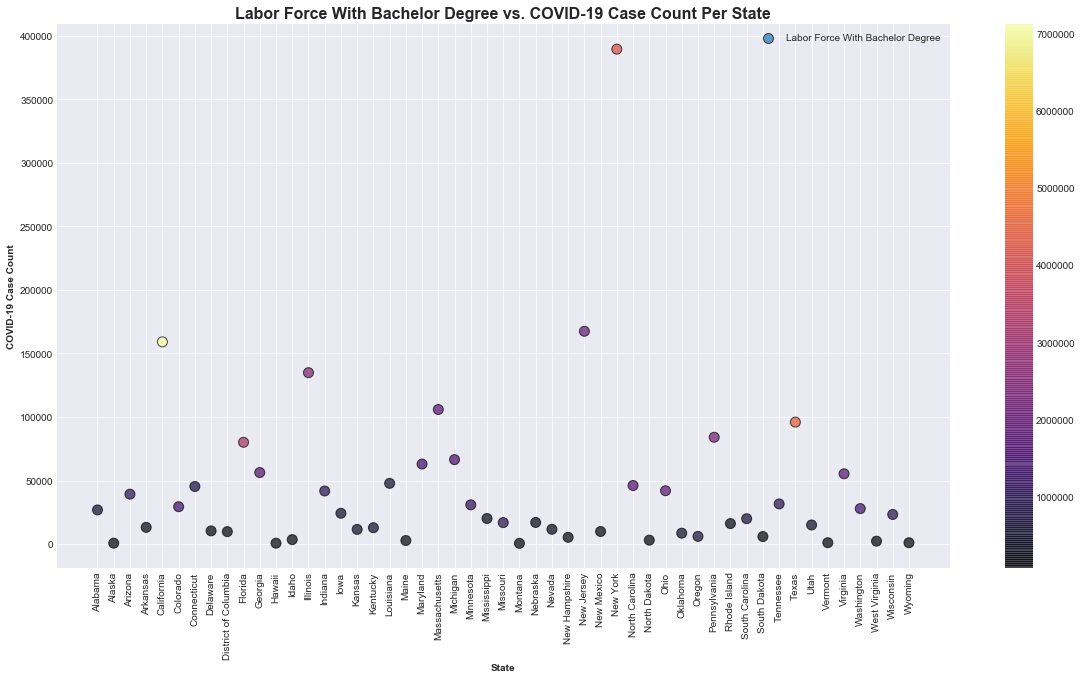

In [43]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Labor Force w/ Bachelor 2018'], cmap = 'inferno')
plt.title('Labor Force With Bachelor Degree vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Labor Force With Bachelor Degree'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

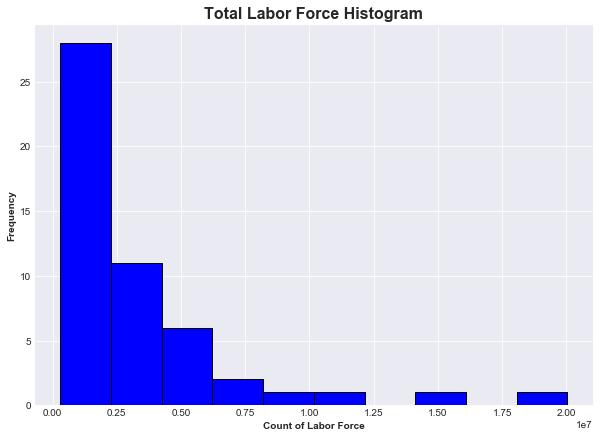

In [44]:
plt.style.use('seaborn-darkgrid')

LitDF['Labor Force Participants 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Labor Force Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

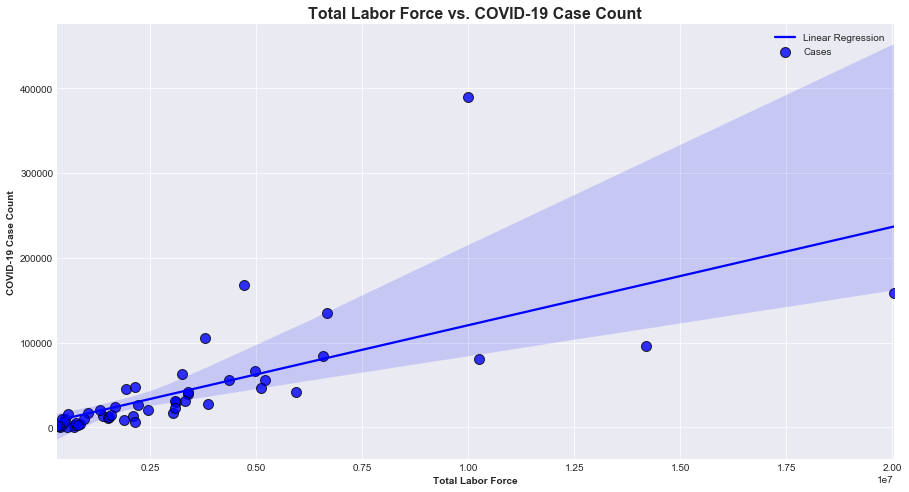

In [45]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Labor Force Participants 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Labor Force vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [46]:
spearmanr(LitDF['cases'], LitDF['Labor Force Participants 2018'])

SpearmanrResult(correlation=0.907420814479638, pvalue=4.421058865335246e-20)

In [47]:
model5 = sm.OLS(LitDF['cases'], LitDF['Labor Force Participants 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.621
Model:                            OLS   Adj. R-squared (uncentered):              0.613
Method:                 Least Squares   F-statistic:                              81.84
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.19e-12
Time:                        00:23:15   Log-Likelihood:                         -620.55
No. Observations:                  51   AIC:                                      1243.
Df Residuals:                      50   BIC:                                      1245.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Labor Force Participants 2018     0.0122      0.001      9.046      0.000       0.009       0.015
==============================================================================
Omnibus:                       71.921   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              853.362
Skew:                           3.649   Prob(JB):                    4.95e-186
Kurtosis:                      21.663   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

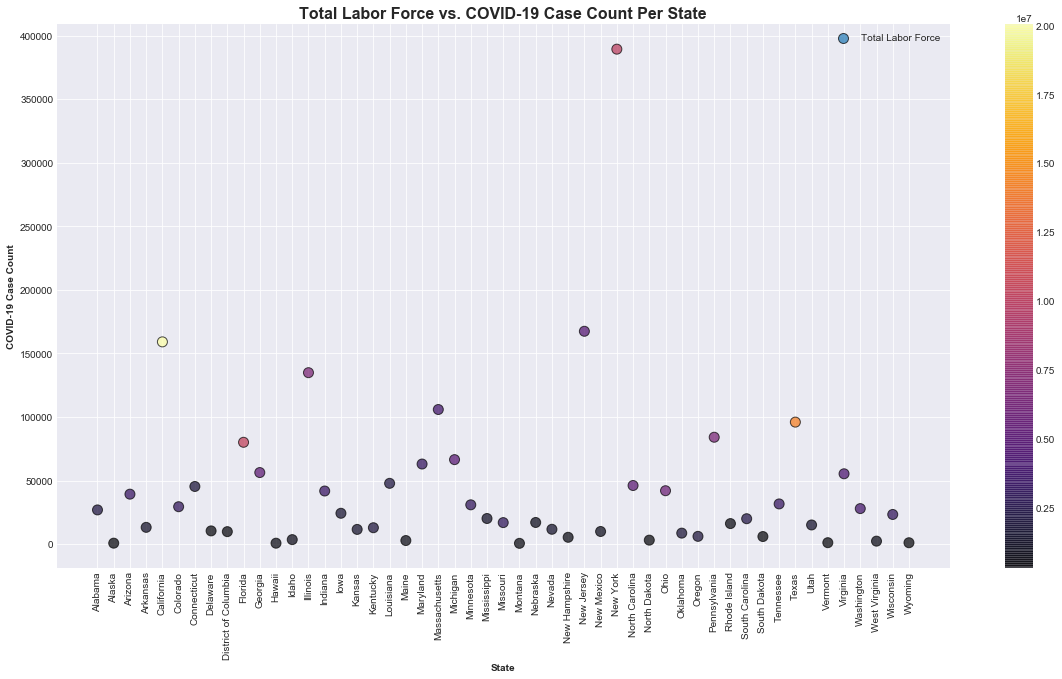

In [48]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Labor Force Participants 2018'], cmap = 'inferno')
plt.title('Total Labor Force vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Labor Force'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

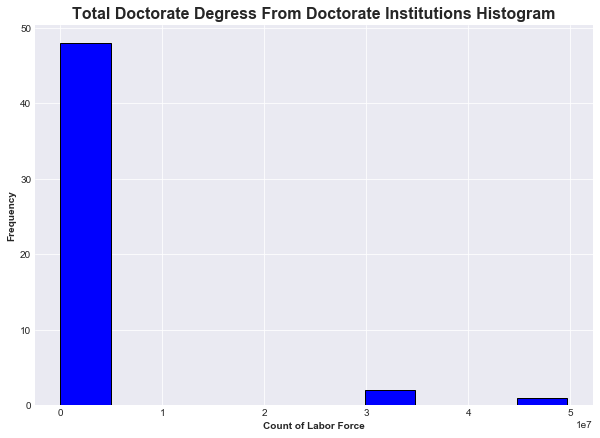

In [49]:
plt.style.use('seaborn-darkgrid')

LitDF['Doctorate From Doc Inst 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Doctorate Degress From Doctorate Institutions Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

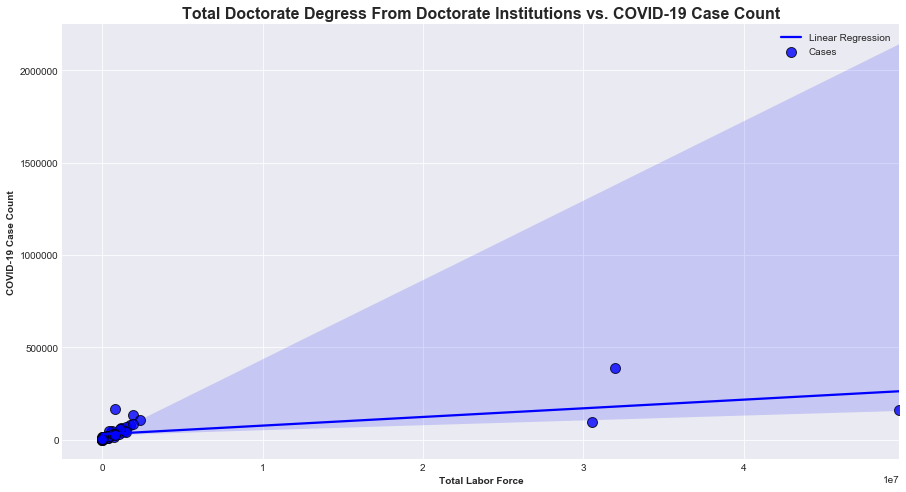

In [50]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Doctorate From Doc Inst 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Doctorate Degress From Doctorate Institutions vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [51]:
spearmanr(LitDF['cases'], LitDF['Doctorate From Doc Inst 2018'])

SpearmanrResult(correlation=0.9297737556561086, pvalue=6.592753980311552e-23)

In [52]:
model5 = sm.OLS(LitDF['cases'], LitDF['Doctorate From Doc Inst 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.469
Method:                 Least Squares   F-statistic:                              46.05
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.30e-08
Time:                        00:23:17   Log-Likelihood:                         -628.63
No. Observations:                  51   AIC:                                      1259.
Df Residuals:                      50   BIC:                                      1261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Doctorate From Doc Inst 2018     0.0056      0.001      6.786      0.000       0.004       0.007
==============================================================================
Omnibus:                       22.990   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.654
Skew:                           1.066   Prob(JB):                     1.24e-15
Kurtosis:                       8.269   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

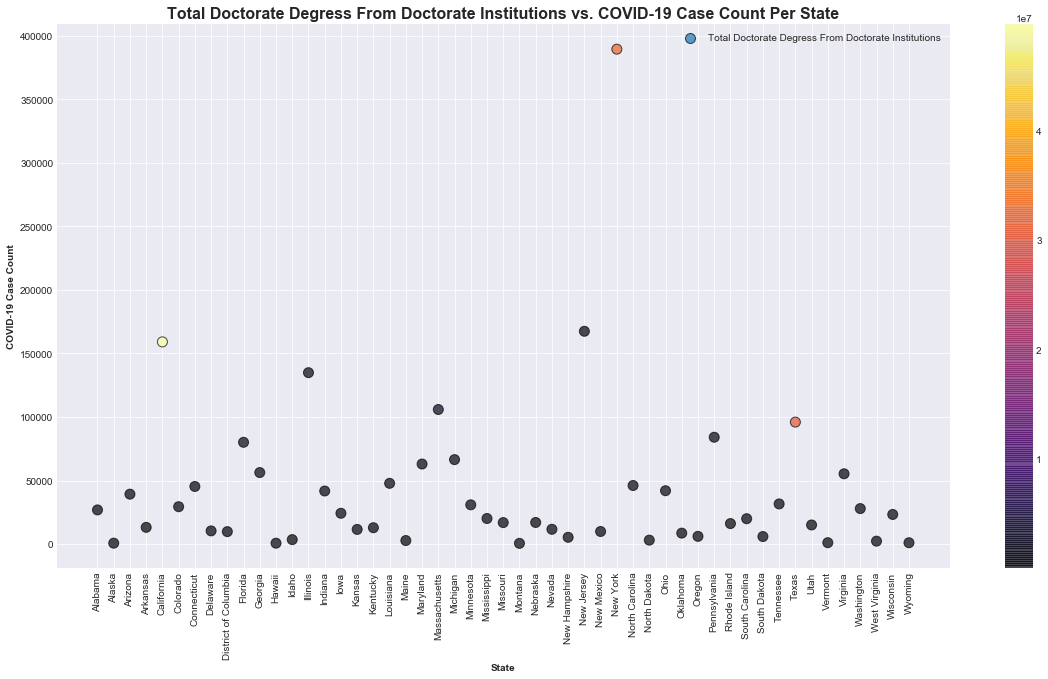

In [53]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Doctorate From Doc Inst 2018'], cmap = 'inferno')
plt.title('Total Doctorate Degress From Doctorate Institutions vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Doctorate Degress From Doctorate Institutions'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

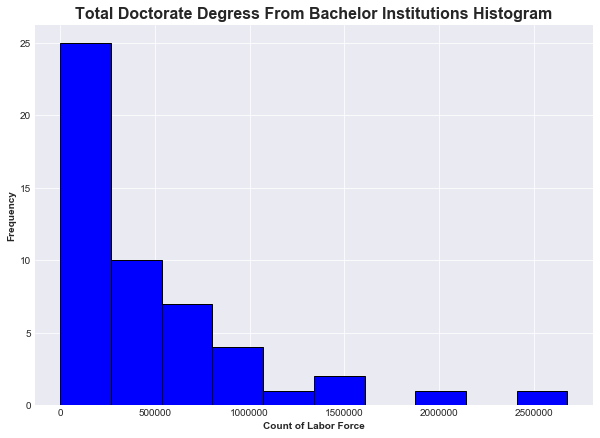

In [54]:
plt.style.use('seaborn-darkgrid')

LitDF['Doctorate From Bach Inst 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Doctorate Degress From Bachelor Institutions Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

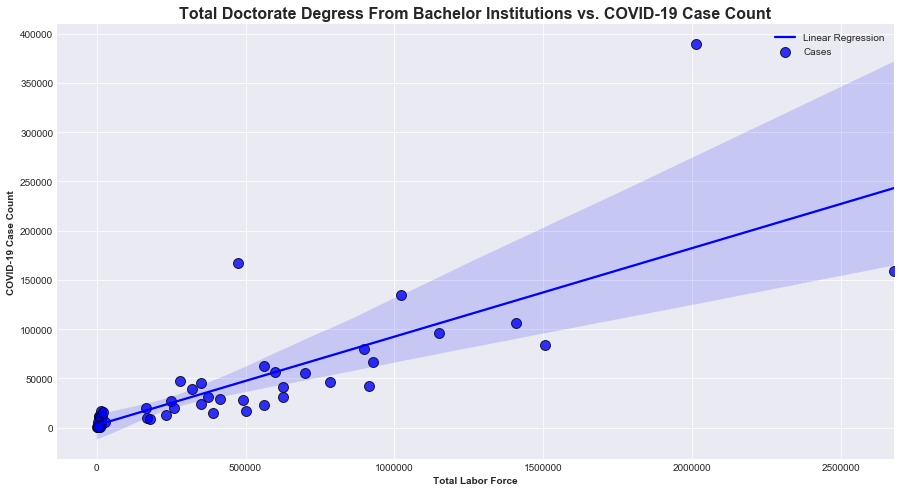

In [55]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Doctorate From Bach Inst 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Doctorate Degress From Bachelor Institutions vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Labor Force', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [56]:
spearmanr(LitDF['cases'], LitDF['Doctorate From Bach Inst 2018'])

SpearmanrResult(correlation=0.9112217194570135, pvalue=1.6554446694031782e-20)

In [57]:
model5 = sm.OLS(LitDF['cases'], LitDF['Doctorate From Bach Inst 2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.725
Method:                 Least Squares   F-statistic:                              135.7
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    7.40e-16
Time:                        00:23:19   Log-Likelihood:                         -611.81
No. Observations:                  51   AIC:                                      1226.
Df Residuals:                      50   BIC:                                      1228.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Doctorate From Bach Inst 2018     0.0922      0.008     11.649      0.000       0.076       0.108
==============================================================================
Omnibus:                       59.514   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.366
Skew:                           2.954   Prob(JB):                    1.08e-100
Kurtosis:                      16.481   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

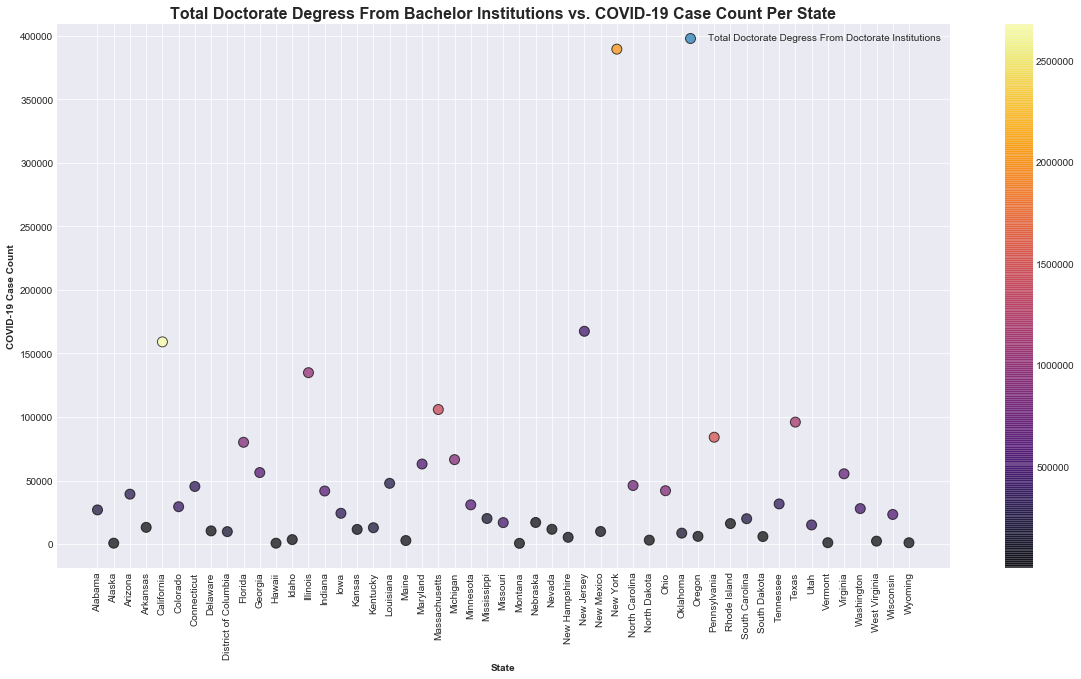

In [58]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Doctorate From Bach Inst 2018'], cmap = 'inferno')
plt.title('Total Doctorate Degress From Bachelor Institutions vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Doctorate Degress From Doctorate Institutions'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

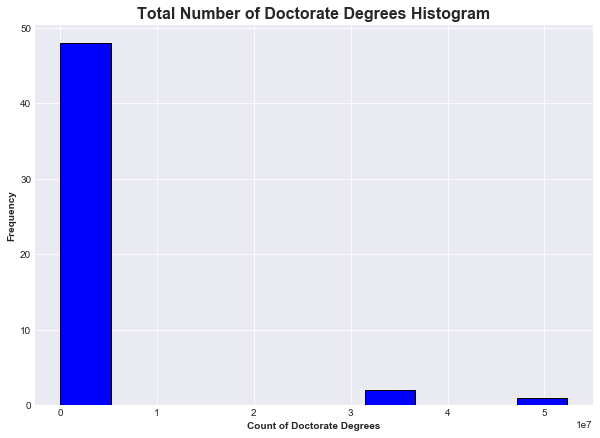

In [59]:
plt.style.use('seaborn-darkgrid')

LitDF['Total Doctorate Degrees 2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Total Number of Doctorate Degrees Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Doctorate Degrees', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

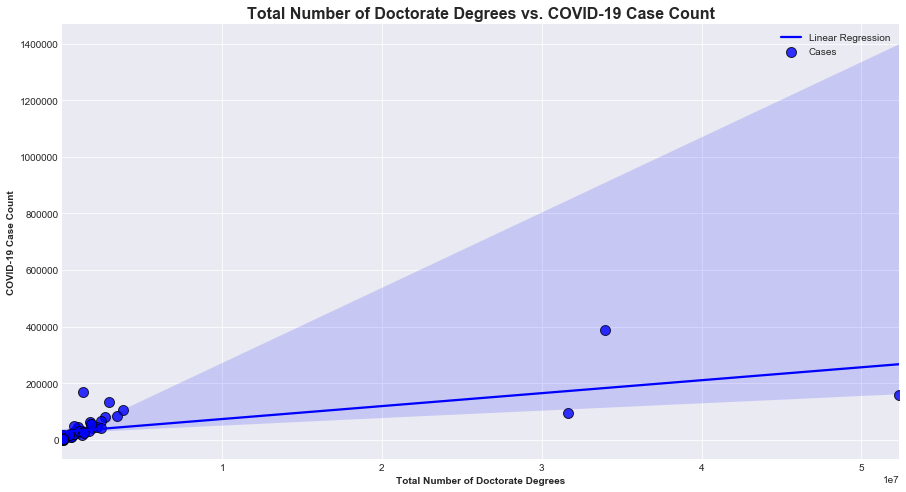

In [60]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Total Doctorate Degrees 2018', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Total Number of Doctorate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Total Number of Doctorate Degrees', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [61]:
spearmanr(LitDF['cases'], LitDF['Total Doctorate Degrees 2018'])

SpearmanrResult(correlation=0.9328506787330316, pvalue=2.2799811068494975e-23)

In [62]:
model6 = sm.OLS(LitDF['cases'], LitDF['Total Doctorate Degrees 2018']).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.511
Model:                            OLS   Adj. R-squared (uncentered):              0.502
Method:                 Least Squares   F-statistic:                              52.34
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    2.58e-09
Time:                        00:23:20   Log-Likelihood:                         -627.01
No. Observations:                  51   AIC:                                      1256.
Df Residuals:                      50   BIC:                                      1258.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Total Doctorate Degrees 2018     0.0055      0.001      7.235      0.000       0.004       0.007
==============================================================================
Omnibus:                       21.817   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.632
Skew:                           0.920   Prob(JB):                     6.22e-17
Kurtosis:                       8.633   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

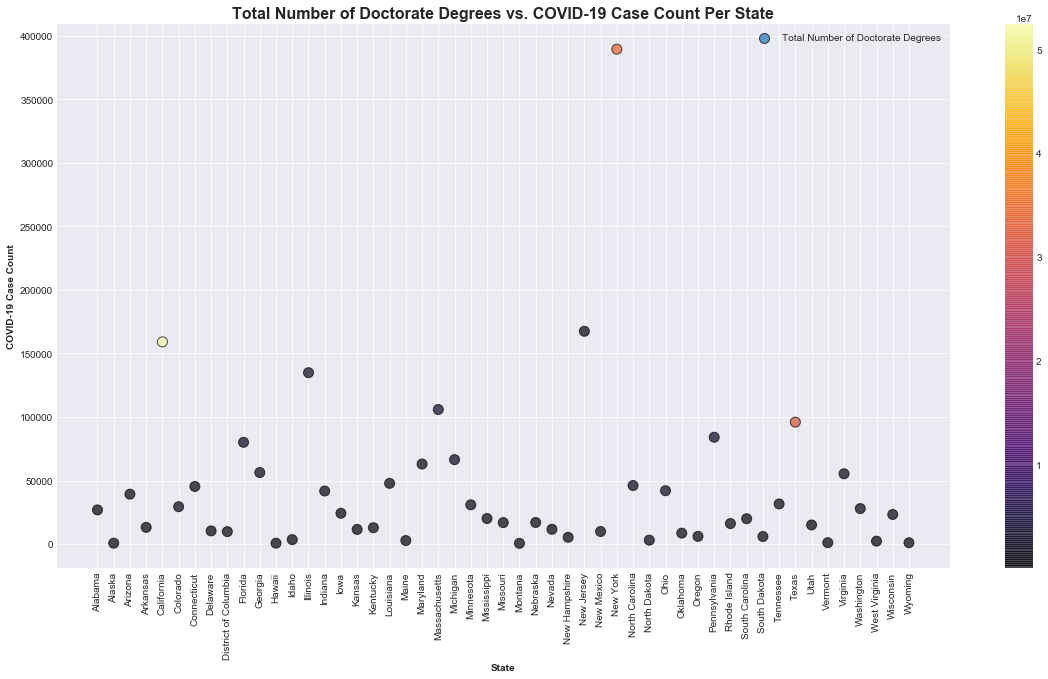

In [63]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Total Doctorate Degrees 2018'], cmap = 'inferno')
plt.title('Total Number of Doctorate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Total Number of Doctorate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

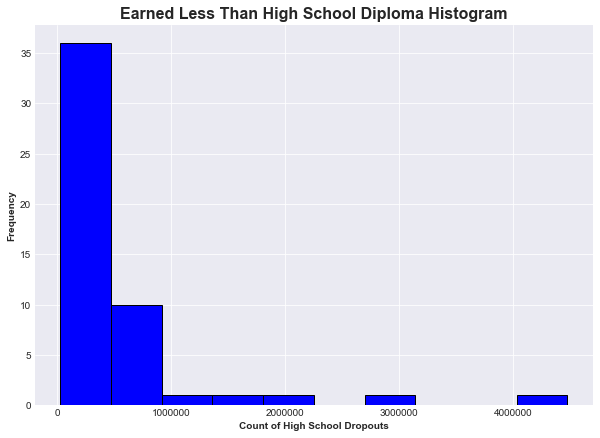

In [64]:
plt.style.use('seaborn-darkgrid')

LitDF['Less Than HS Diploma 14-18'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Less Than High School Diploma Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Dropouts', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

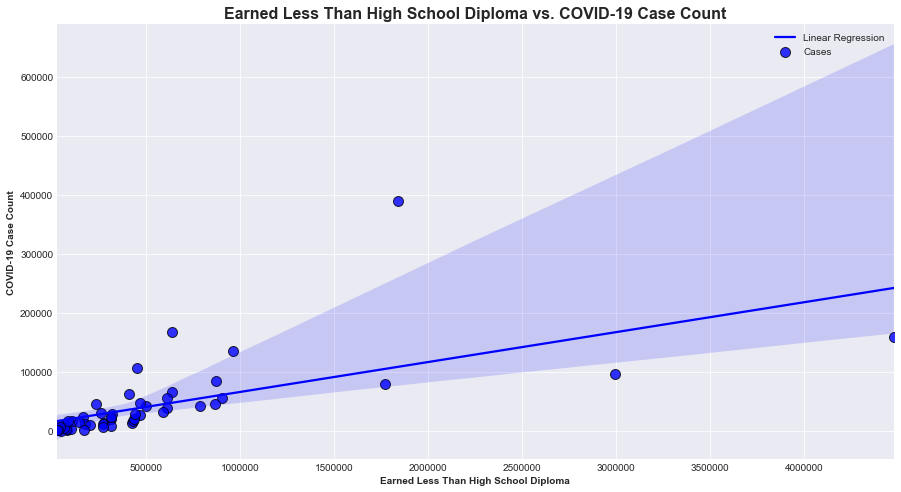

In [65]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Less Than HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Earned Less Than High School Diploma vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Earned Less Than High School Diploma', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [66]:
spearmanr(LitDF['cases'], LitDF['Less Than HS Diploma 14-18'])

SpearmanrResult(correlation=0.886606334841629, pvalue=4.968483602309041e-18)

In [67]:
model7 = sm.OLS(LitDF['cases'], LitDF['Less Than HS Diploma 14-18']).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.544
Model:                            OLS   Adj. R-squared (uncentered):              0.535
Method:                 Least Squares   F-statistic:                              59.68
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.44e-10
Time:                        00:23:22   Log-Likelihood:                         -625.24
No. Observations:                  51   AIC:                                      1252.
Df Residuals:                      50   BIC:                                      1254.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Less Than HS Diploma 14-18     0.0600      0.008      7.725      0.000       0.044       0.076
==============================================================================
Omnibus:                       61.358   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              553.725
Skew:                           2.989   Prob(JB):                    5.76e-121
Kurtosis:                      17.995   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

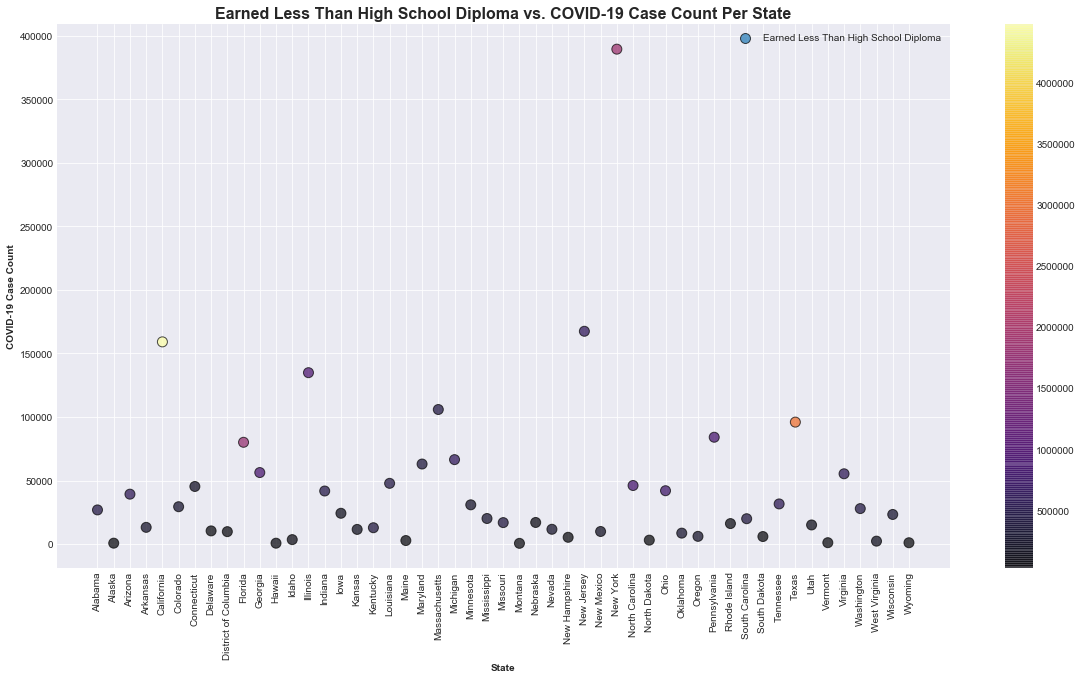

In [68]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Less Than HS Diploma 14-18'], cmap = 'inferno')
plt.title('Earned Less Than High School Diploma vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Earned Less Than High School Diploma'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

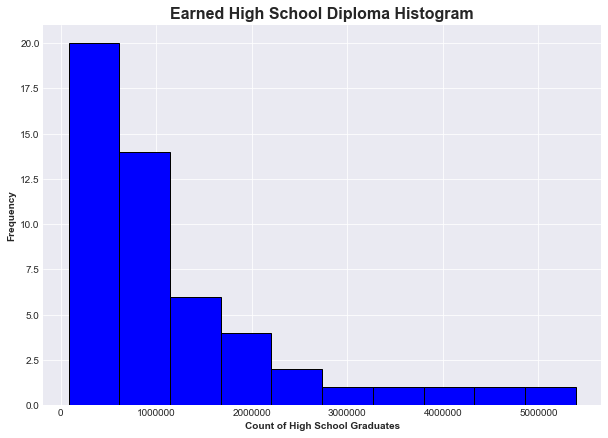

In [69]:
plt.style.use('seaborn-darkgrid')

LitDF['HS Diploma 14-18'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Earned High School Diploma Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of High School Graduates', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

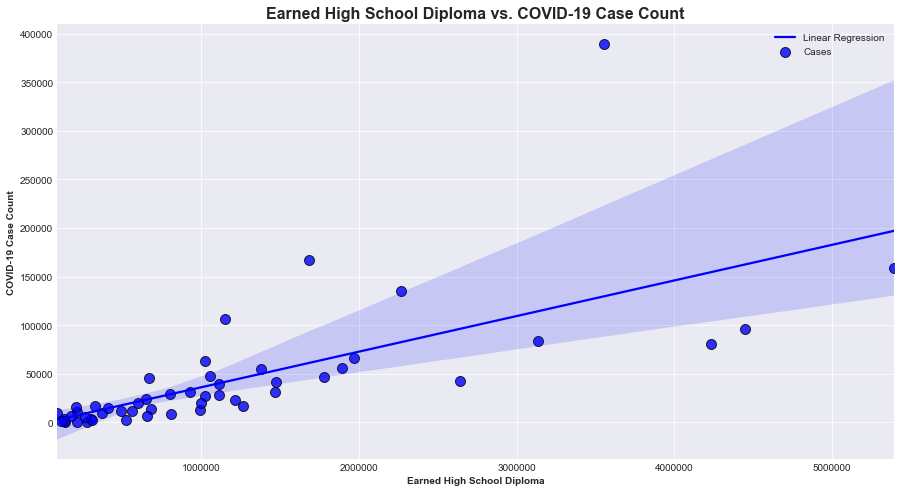

In [70]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'HS Diploma 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Earned High School Diploma vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Earned High School Diploma', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [71]:
spearmanr(LitDF['cases'], LitDF['HS Diploma 14-18'])

SpearmanrResult(correlation=0.8809954751131222, pvalue=1.517169568294067e-17)

In [72]:
model8 = sm.OLS(LitDF['cases'], LitDF['HS Diploma 14-18']).fit()
model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.633
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              86.06
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.89e-12
Time:                        00:23:24   Log-Likelihood:                         -619.74
No. Observations:                  51   AIC:                                      1241.
Df Residuals:                      50   BIC:                                      1243.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
HS Diploma 14-18     0.0364      0.004      9.277      0.000       0.029       0.044
==============================================================================
Omnibus:                       72.392   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              829.558
Skew:                           3.716   Prob(JB):                    7.31e-181
Kurtosis:                      21.307   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

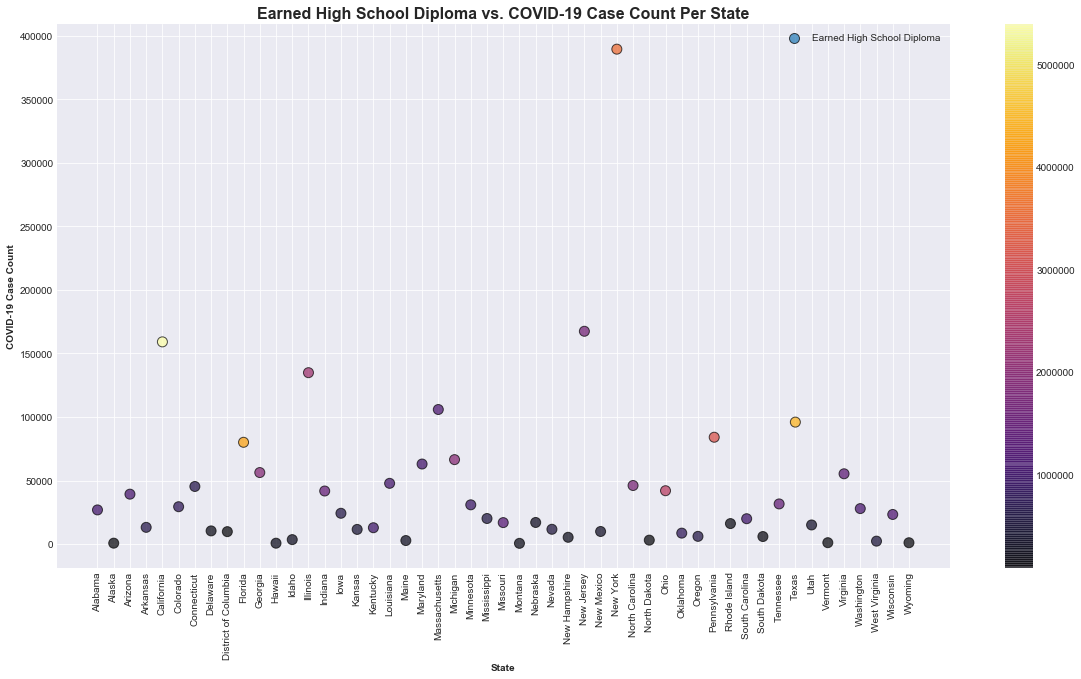

In [73]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['HS Diploma 14-18'], cmap = 'inferno')
plt.title('Earned High School Diploma vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Earned High School Diploma'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

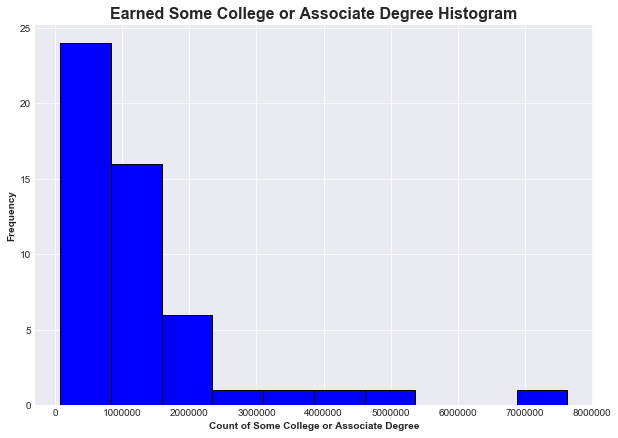

In [74]:
plt.style.use('seaborn-darkgrid')

LitDF['Some College or Associate Degree 14-18'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Some College or Associate Degree Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Some College or Associate Degree', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

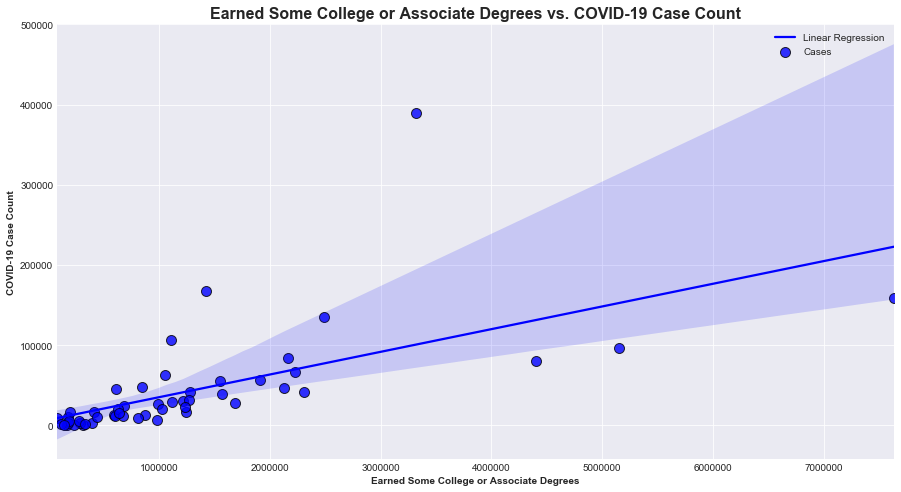

In [75]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Some College or Associate Degree 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Earned Some College or Associate Degrees vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Earned Some College or Associate Degrees', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [76]:
spearmanr(LitDF['cases'], LitDF['Some College or Associate Degree 14-18'])

SpearmanrResult(correlation=0.8657013574660632, pvalue=2.4425385152274755e-16)

In [77]:
model9 = sm.OLS(LitDF['cases'], LitDF['Some College or Associate Degree 14-18']).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.568
Model:                            OLS   Adj. R-squared (uncentered):              0.559
Method:                 Least Squares   F-statistic:                              65.61
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    1.16e-10
Time:                        00:23:26   Log-Likelihood:                         -623.90
No. Observations:                  51   AIC:                                      1250.
Df Residuals:                      50   BIC:                                      1252.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Some College or Associate Degree 14-18     0.0308      0.004      8.100      0.000       0.023       0.038
==============================================================================
Omnibus:                       74.131   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              886.115
Skew:                           3.834   Prob(JB):                    3.83e-193
Kurtosis:                      21.926   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

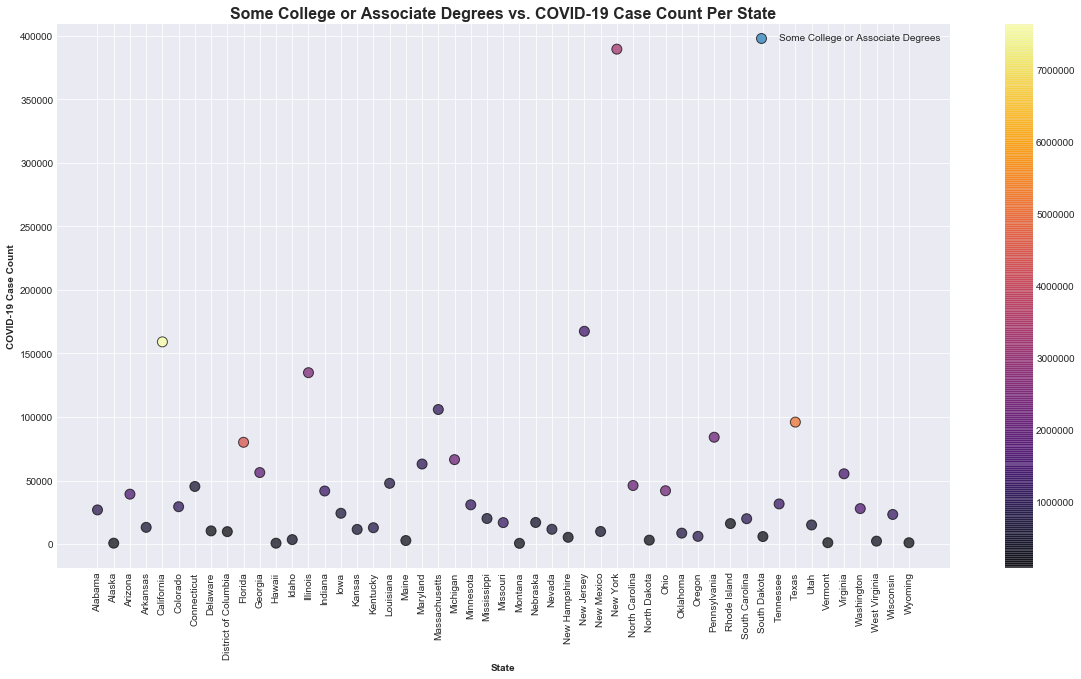

In [78]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Some College or Associate Degree 14-18'], cmap = 'inferno')
plt.title('Some College or Associate Degrees vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Some College or Associate Degrees'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

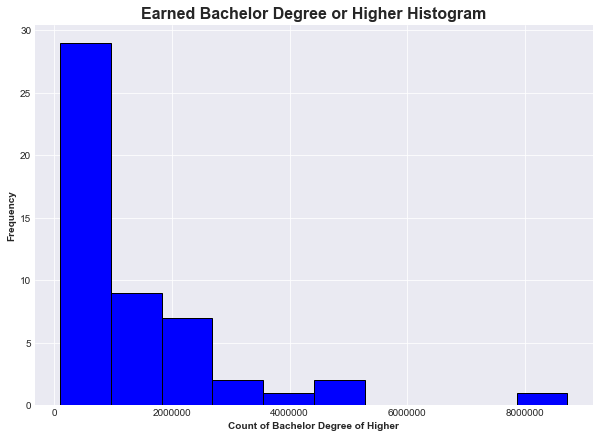

In [79]:
plt.style.use('seaborn-darkgrid')

LitDF['Bachelor Degree or Higher 14-18'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Earned Bachelor Degree or Higher Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of Bachelor Degree of Higher', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

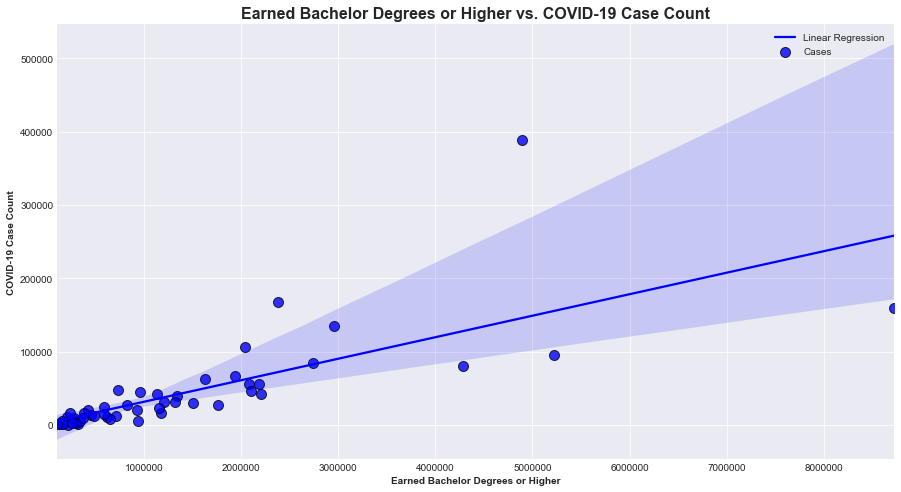

In [80]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Bachelor Degree or Higher 14-18', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Earned Bachelor Degrees or Higher vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Earned Bachelor Degrees or Higher', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [81]:
spearmanr(LitDF['cases'], LitDF['Bachelor Degree or Higher 14-18'])

SpearmanrResult(correlation=0.9112217194570135, pvalue=1.6554446694031782e-20)

In [82]:
model10 = sm.OLS(LitDF['cases'], LitDF['Bachelor Degree or Higher 14-18']).fit()
model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.672
Method:                 Least Squares   F-statistic:                              105.5
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    6.46e-14
Time:                        00:23:28   Log-Likelihood:                         -616.34
No. Observations:                  51   AIC:                                      1235.
Df Residuals:                      50   BIC:                                      1237.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Bachelor Degree or Higher 14-18     0.0301      0.003     10.272      0.000       0.024       0.036
==============================================================================
Omnibus:                       67.878   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              776.316
Skew:                           3.340   Prob(JB):                    2.66e-169
Kurtosis:                      20.908   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

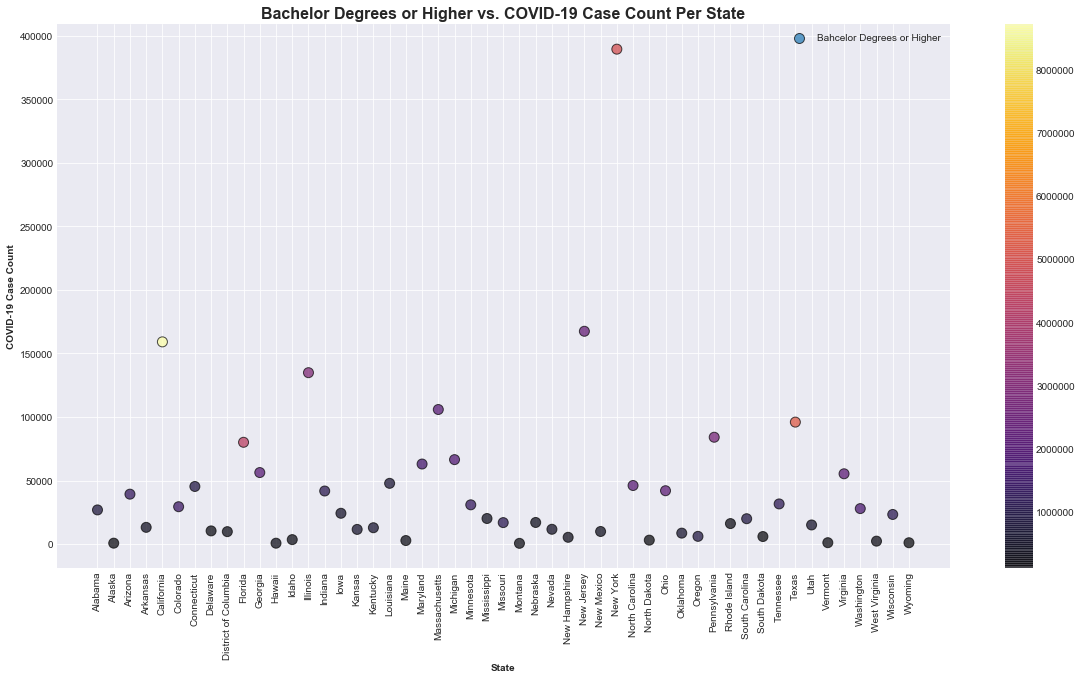

In [83]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['Bachelor Degree or Higher 14-18'], cmap = 'inferno')
plt.title('Bachelor Degrees or Higher vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Bahcelor Degrees or Higher'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

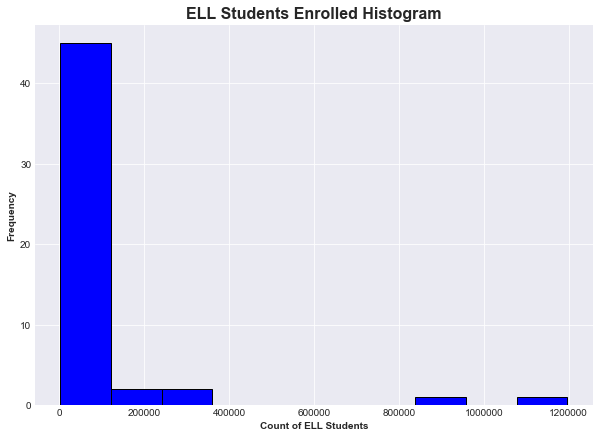

In [84]:
plt.style.use('seaborn-darkgrid')

LitDF['ELL Students Enrolled 2017'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('ELL Students Enrolled Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count of ELL Students', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

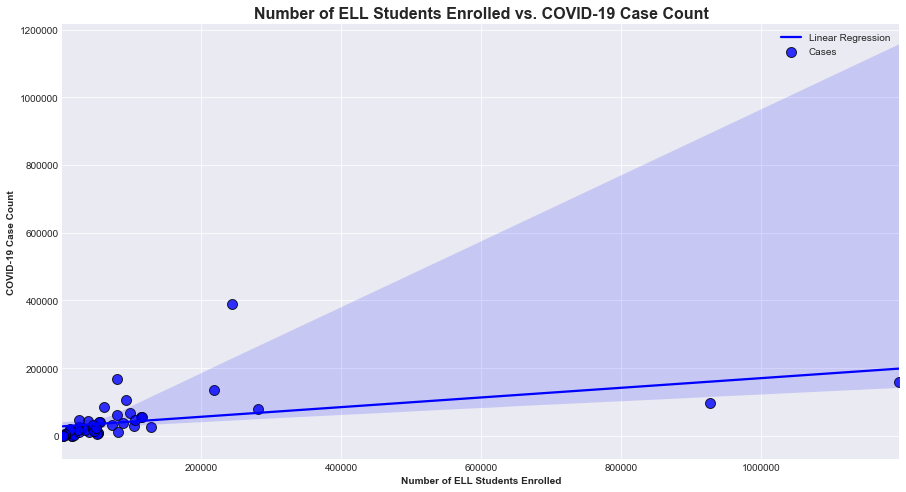

In [85]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'ELL Students Enrolled 2017', y = 'cases', data = LitDF, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Number of ELL Students Enrolled vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Number of ELL Students Enrolled', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [86]:
spearmanr(LitDF['cases'], LitDF['ELL Students Enrolled 2017'])

SpearmanrResult(correlation=0.814841628959276, pvalue=3.4332249336362685e-13)

In [87]:
model11 = sm.OLS(LitDF['cases'], LitDF['ELL Students Enrolled 2017']).fit()
model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.345
Model:                            OLS   Adj. R-squared (uncentered):              0.332
Method:                 Least Squares   F-statistic:                              26.36
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    4.67e-06
Time:                        00:23:30   Log-Likelihood:                         -634.47
No. Observations:                  51   AIC:                                      1271.
Df Residuals:                      50   BIC:                                      1273.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
ELL Students Enrolled 2017     0.1956      0.038      5.134      0.000       0.119       0.272
==============================================================================
Omnibus:                       69.802   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.277
Skew:                           3.529   Prob(JB):                    6.64e-167
Kurtosis:                      20.616   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

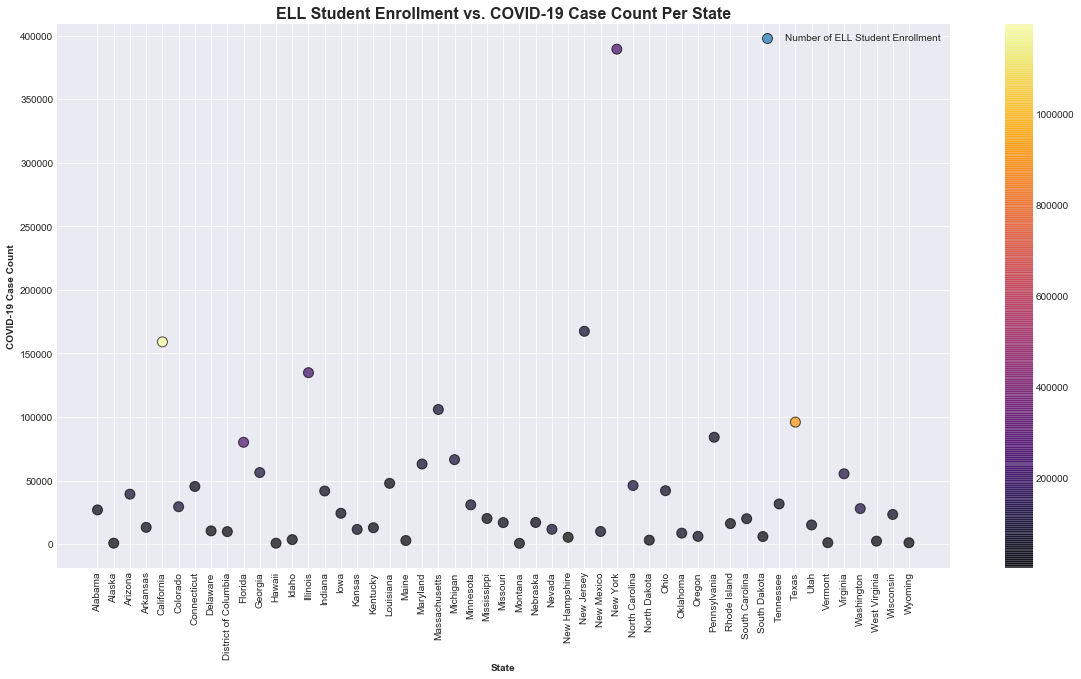

In [88]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = LitDF['State'] 
y = LitDF['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = LitDF['ELL Students Enrolled 2017'], cmap = 'inferno')
plt.title('ELL Student Enrollment vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Number of ELL Student Enrollment'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [89]:
model12 = sm.OLS(LitDF['cases'], LitDF[['4th 2015 Math', '4th 2015 Science', '8th 2015 Math',
                                       '8th 2015 Science', 'Labor Force w/ Bachelor 2018',
                                       'Total Doctorate Degrees 2018', 'Less Than HS Diploma 14-18',
                                       'HS Diploma 14-18', 'Some College or Associate Degree 14-18',
                                       'Bachelor Degree or Higher 14-18', 'ELL Students Enrolled 2017']]).fit()
model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.904
Method:                 Least Squares   F-statistic:                              44.50
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    6.35e-19
Time:                        00:23:31   Log-Likelihood:                         -579.41
No. Observations:                  51   AIC:                                      1181.
Df Residuals:                      40   BIC:                                      1202.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
4th 2015 Math                           -523.9995   1662.417     -0.315      0.754   -3883.869    2835.870
4th 2015 Science                         487.8654   1780.237      0.274      0.785   -3110.128    4085.859
8th 2015 Math                            982.1893   1306.581      0.752      0.457   -1658.509    3622.888
8th 2015 Science                       -1438.9317   1673.514     -0.860      0.395   -4821.230    1943.367
Labor Force w/ Bachelor 2018               0.0840      0.073      1.147      0.258      -0.064       0.232
Total Doctorate Degrees 2018               0.0050      0.001      3.623      0.001       0.002       0.008
Less Than HS Diploma 14-18                -0.0108      0.049     -0.220      0.827      -0.110       0.088
HS Diploma 14-18                           0.0239      0.018      1.331      0.191      -0.012       0.060
Some College or Associate Degree 14-18    -0.0503      0.025     -2.042      0.048      -0.100      -0.001
Bachelor Degree or Higher 14-18           -0.0017      0.066     -0.026      0.979      -0.135       0.131
ELL Students Enrolled 2017                -0.2935      0.092     -3.206      0.003      -0.479      -0.108
==============================================================================
Omnibus:                        4.741   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                5.439
Skew:                          -0.151   Prob(JB):                       0.0659
Kurtosis:                       4.571   Cond. No.                     8.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""